**ETUDE DE MARCHE - DEVELOPEMENT D'UNE ACTIVITE DE VENTE DE POULETS A L'INTERNATIONAL**

    Partie 2 - Analyse des données.
    
Objectif : A partir d'une classification hiérarchique ascendante, créer 5 (ou plus) groupes de pays. Caractériser ces groupes de pays au regard des variables observées et vérifier qu'ils sont significativement distincts. Visualiser les résultats sur le premier plan factoriel obtenu par ACP et commenter les projections. Cibler les pays aux potentiels le plus intéressants pour le développement du marché.

**DATA SOURCES**

> P5_Etude_Marche\data\processed\data_prep

# Tools

In [117]:
# Librairies

# System
from pathlib import Path 

# Algebre et manipulation des data
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Stats

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

from scipy.cluster.hierarchy import dendrogram,linkage, fcluster,cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.stats import norm, shapiro, bartlett, ttest_ind, fisher_exact

from statsmodels.graphics.gofplots import qqplot

# Plot

import functions

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
%matplotlib inline

import pylab # Etiquettes de données sur boxplot

import seaborn as sns # Mise en forme de graphiques plus jolie
sns.set()

In [2]:
# Dataset

data = Path.cwd() / "data" / "processed" / "data_prep.csv" 

data = pd.read_csv(data)

data.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
0,1,Armenia,2924.0,985.68,90.06,0.480124,2893509.0,0.012606,7727.9,0.11
1,2,Afghanistan,2087.0,351.41,58.26,0.209578,31731688.0,0.106906,1848.7,-2.52
2,3,Albania,3188.0,1095.54,111.37,0.533447,2918978.0,0.003825,10492.8,0.09
3,4,Algeria,3293.0,809.13,91.92,0.271758,38338562.0,0.072113,13253.6,-1.20
4,7,Angola,2474.0,701.46,57.27,0.321285,25998340.0,0.127110,6188.0,-0.39


# Visualisation des data

## Economie et géopolitique

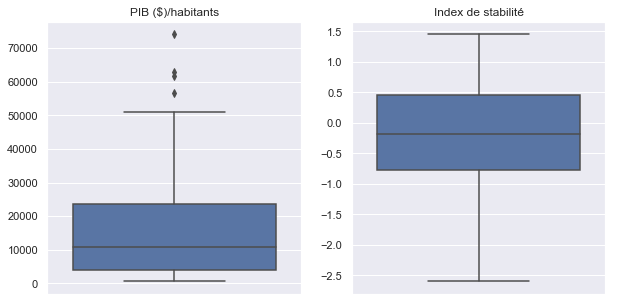

In [3]:
# Box plot

#Figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

# Data
PIB = data['PIB$/hab'].tolist()
Ind = data['Ix_stab'].tolist()

# Plot 
sns.boxplot(y = PIB, ax=ax1).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax2).set_title('Index de stabilité')

# BackUp
plt.savefig('reports/Plot/boxplot_Eco.png')
plt.show()

In [4]:
# Outliers sur PIB/habitants

data[data['PIB$/hab'] > 50000].Country

64                       Kuwait
90                       Norway
115                 Switzerland
124        United Arab Emirates
128    United States of America
Name: Country, dtype: object

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


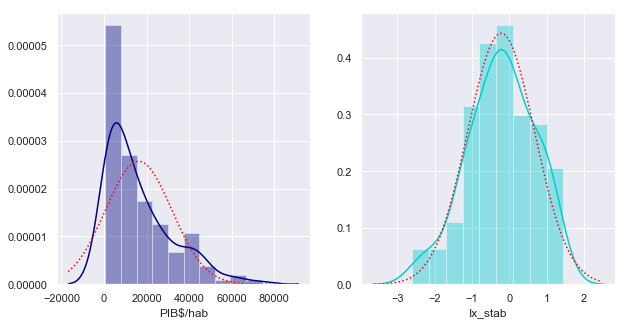

In [5]:
# Histogrammes 

#Figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

# Data
X = 'PIB$/hab'
X0 = 'Ix_stab'

# Data preparation
x = pd.Series(data[X].tolist(), name=X)
x0 = pd.Series(data[X0].tolist(), name=X0)

# Plot
sns.distplot(x, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_eco.png') 
plt.show()

In [6]:
# Résumé pays à fort PIB et fort index de stabilité 

X1 = data[data['PIB$/hab'] > 40000]['Country'].tolist()
Y1 = data[data['Ix_stab'] > 0.64]['Country'].tolist()

sY1 = set(Y1)
sX1 = set(X1)
list1 = [x for x in Y1 if x in sX1]
list2 = [x for x in Y1 if x not in sX1]

print('\n Pays à fort PIB \n',X1)

print('\n Pays à fort index de stabilité uniquement \n',list2)

print('\n Proportion des pays dans les 2 listes: {:.2%}'.format(len(list1)/len(X1)))

print('\n Pays à fort PIB et fort index de stabilité \n',list1)


 Pays à fort PIB 
 ['Australia', 'Austria', 'Canada', 'Denmark', 'Germany', 'Ireland', 'Kuwait', 'Netherlands', 'Norway', 'Saudi Arabia', 'Sweden', 'Switzerland', 'Oman', 'United Arab Emirates', 'United States of America', 'Belgium']

 Pays à fort index de stabilité uniquement 
 ['Botswana', 'Costa Rica', 'Estonia', 'Finland', 'Hungary', 'Japan', 'Lithuania', 'Mauritius', 'New Zealand', 'Czechia', 'Poland', 'Portugal', 'Slovenia', 'Slovakia', 'Uruguay']

 Proportion des pays dans les 2 listes: 75.00%

 Pays à fort PIB et fort index de stabilité 
 ['Australia', 'Austria', 'Canada', 'Denmark', 'Germany', 'Ireland', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'United Arab Emirates', 'Belgium']


<div class="alert alert-block alert-info">
<b>Tip:</b> ~75% des pays à fort PIB ont aussi un index de stabilité fort.
</div>

In [7]:
# Résumé pays à faible PIB et faible index de stabilité 

X2 = data[data['PIB$/hab'] < 5056]['Country'].tolist()
Y2 = data[data['Ix_stab'] < -0.52500]['Country'].tolist()

sY2 = set(Y2)
sX2 = set(X2)
list1 = [x for x in Y2 if x in sX2]
list2 = [x for x in Y2 if x not in sX2]

print('\n Pays à faible PIB \n',X2)

print('\n Pays à faible index de stabilité uniquement \n',list2)

print('\n Proportion des pays dans les 2 listes: {:.2%}'.format(len(list1)/len(X2)))

print('\n Pays à faible PIB et faible index de stabilité \n',list1)


 Pays à faible PIB 
 ['Afghanistan', 'Bangladesh', 'Myanmar', 'Cameroon', 'Central African Republic', 'Chad', 'Benin', 'Gambia', 'Ghana', 'Guinea', 'Haiti', 'Honduras', "Côte d'Ivoire", 'Kyrgyzstan', 'Kenya', 'Cambodia', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Republic of Moldova', 'Nepal', 'Nicaragua', 'Niger', 'Pakistan', 'Guinea-Bissau', 'Zimbabwe', 'Rwanda', 'Senegal', 'Sierra Leone', 'Tajikistan', 'United Republic of Tanzania', 'Togo', 'Uganda', 'Burkina Faso', 'Viet Nam', 'Ethiopia', 'Yemen', 'Zambia', 'Sudan']

 Pays à faible index de stabilité uniquement 
 ['Algeria', 'Sri Lanka', 'Colombia', 'Egypt', 'Guatemala', 'India', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Jordan', 'Lebanon', 'Mexico', 'Nigeria', 'Paraguay', 'Peru', 'Philippines', 'Russian Federation', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'Uzbekistan', 'Venezuela (Bolivarian Republic of)']

 Proportion des pays dans les 2 listes: 58.14%

 Pays à faible PIB et fai

<div class="alert alert-block alert-info">
    
- ~58% des pays à faible PIB ont aussi un index de stabilité faible.
</div>

<div class="alert alert-block alert-warning">

- Existe-t-il une corrélation entre nos variables ?

</div>

## Ressources alimentaires

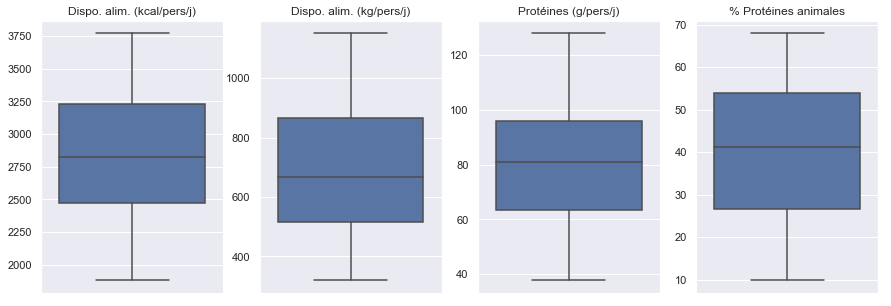

In [8]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,5))

# Data
FS_kcal = data['FS (kcal/pers/d)'].tolist()
FS_kg = data['FS (kg/pers/d)'].tolist()
Prot = data['ProtS (g/pers/d)'].tolist()
Prot_p = data['%ProtA'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')


# BackUp
plt.savefig('reports/Plot/boxplot_Food.png')
plt.show()

In [10]:
# Pays en dessous du seuil de FAO en Prot gr/pers/jour

data[data['ProtS (g/pers/d)'] < 52].Country

16     Central African Republic
21                        Congo
44                        Haiti
69                      Liberia
71                   Madagascar
80                   Mozambique
99                Guinea-Bissau
101                    Zimbabwe
Name: Country, dtype: object

In [13]:
# Pays à régime carnivore prononcé

data[data['%ProtA'] > 0.6].Country

5                     Argentina
6                     Australia
26                      Denmark
33                      Finland
34                       France
38                      Germany
70                    Lithuania
78                     Mongolia
84                  Netherlands
98                     Portugal
111                       Spain
114                      Sweden
115                 Switzerland
128    United States of America
Name: Country, dtype: object

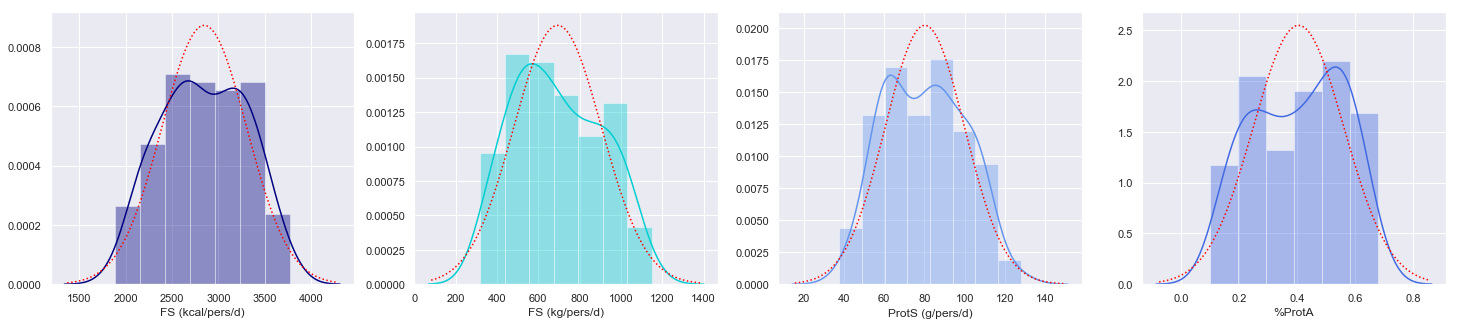

In [400]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,5))

# Data
X = 'FS (kcal/pers/d)'
X0 = 'FS (kg/pers/d)'
X1 = 'ProtS (g/pers/d)'
X2 = '%ProtA'

# Data preparation
x = pd.Series(data[X].tolist(), name=X)
x0 = pd.Series(data[X0].tolist(), name=X0)
x1 = pd.Series(data[X1].tolist(), name=X1)
x2 = pd.Series(data[X2].tolist(), name=X2)

# Plot
sns.distplot(x, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})


# BackUp
plt.savefig('reports/Plot/Hist_food.png') 
plt.show()

## Population

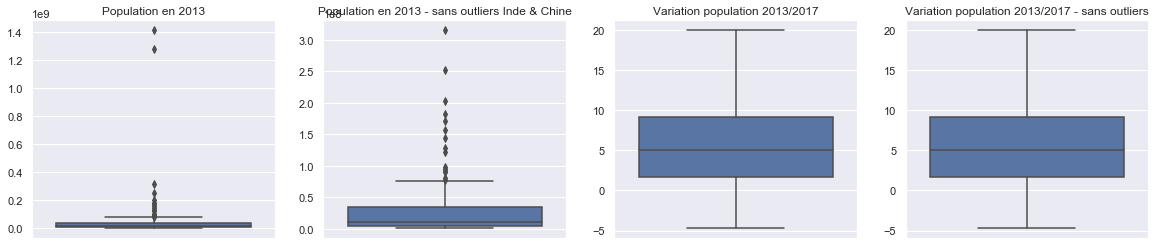

In [35]:
# Box plot

#Figure
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4))

# Data
Pop = data['pop2013'].tolist()
Var_pop = data['Var_pop (%)'].map(lambda x : x*100).tolist()

X = data.copy()
X = X.drop([48,140]) # outliers

Pop2 = X['pop2013'].tolist()
Var_pop2 = X['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = Pop, ax=ax1).set_title('Population en 2013')
sns.boxplot(y=Var_pop, ax=ax3).set_title('Variation population 2013/2017')
sns.boxplot(y = Pop2, ax=ax2).set_title('Population en 2013 - sans outliers Inde & Chine')
sns.boxplot(y=Var_pop2, ax=ax4).set_title('Variation population 2013/2017 - sans outliers')

# BackUp
plt.savefig('reports/Plot/boxplot_pop.png')
plt.show()

In [402]:
# Outliers sur population

data[data.pop2013 > 1200000000]['Country']

48     India
140    China
Name: Country, dtype: object

In [17]:
# Valeurs hautes sur variation de population

data[data['Var_pop (%)'] > 0.12]['Country']

4       Angola
59      Jordan
64      Kuwait
67     Lebanon
88       Niger
121       Oman
125     Uganda
Name: Country, dtype: object

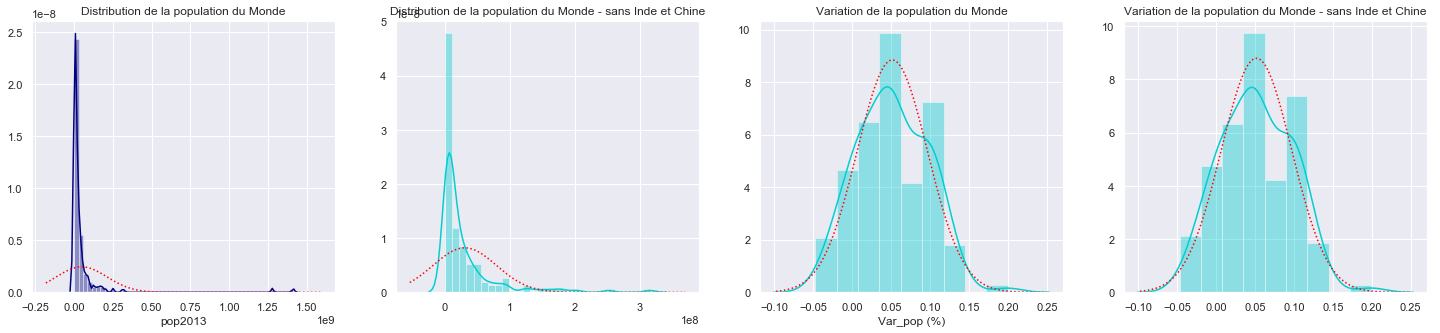

In [404]:
# Histogrammes 

#Figure
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(25,5))

# Data
X = 'pop2013'
X0 = 'Var_pop (%)'

Xbis = data.copy()
Xbis = Xbis.drop([48,140]) # outliers

# Data preparation
x = pd.Series(data[X].tolist(), name=X)
x0 = pd.Series(data[X0].tolist(), name=X0)
x1 = pd.Series(Xbis[X].tolist())
x2 = pd.Series(Xbis[X0].tolist())

# Plot
sns.distplot(x, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2, color="darkturquoise", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# Titles
ax1.set_title('Distribution de la population du Monde')
ax2.set_title('Distribution de la population du Monde - sans Inde et Chine')

ax3.set_title('Variation de la population du Monde')
ax4.set_title('Variation de la population du Monde - sans Inde et Chine')

# BackUp
plt.savefig('reports/Plot/Hist_pop.png') 
plt.show()

<div class="alert alert-block alert-info">
<b>Tip:</b> 

- La distribution de la population en 2013 est fortement asymétrique vers les valeurs hautes : la Chine et l'Inde correspondent à ces 2 outliers. 

- La distribution de la variation de la population entre 2010-2013 semble suivre une loi Normale sur l'histogramme.

</div>

# Corrélation

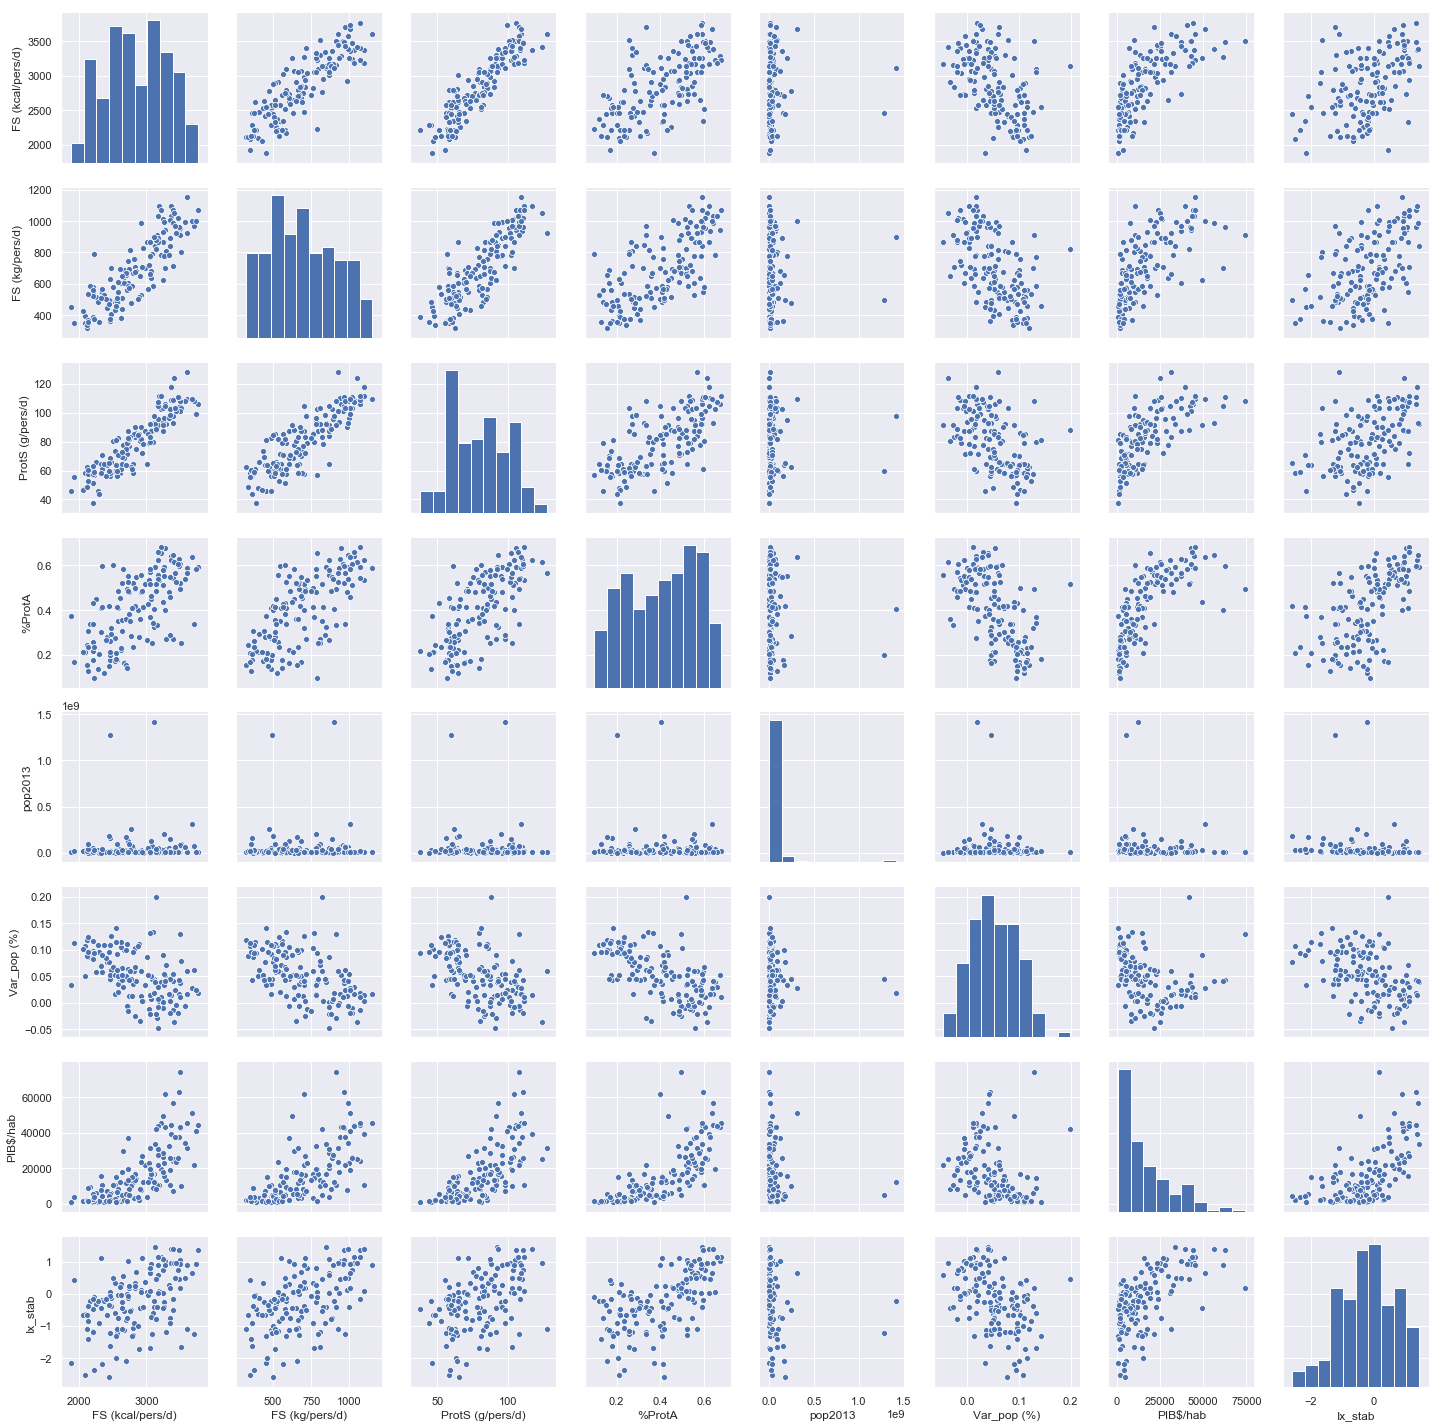

In [405]:
# Analyse bivariée 

sns.pairplot(data.iloc[:,2:])

plt.savefig('reports/Plot/pairplot.png')

Ce pairplot corrobore des intuitions que nous avons sur les dépendances entre variables. 

- relation positive entre les variables liées à la ressources alimentaire : FS en kcal/pers/jour, FS en kg/pers/jour, Prot en gr/pers/jour, %prot.
- relation positive entre la stabilité géopolitique d'un pays et ses ressources alimentaires.
- relation négative entre la variation de population d'un pays et ses ressources alimentaires, sa stabilité géopolitique.
- relation positive probablement non linéaire entre le PIB/habitants et les ressources alimentaires d'un pays.

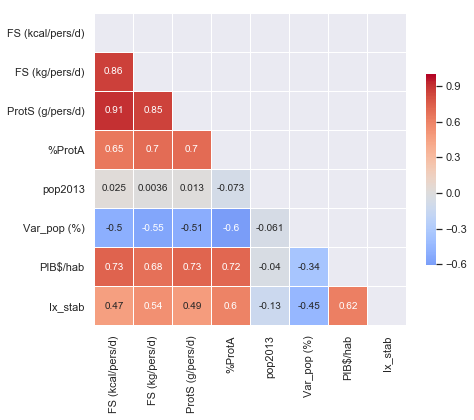

In [18]:
# Covariance matrix 
corr = data.iloc[:,2:].corr()

# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr, dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True    

# Settings
fig, ax = plt.subplots(figsize=(7, 7)) 

# HeatMap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# BackUp
plt.savefig('reports/Plot/heatmap_matrix_corr.png')

<div class="alert alert-block alert-info">

On observe des corrélations entre :

- **La disponibilité alimentaire (en kcal-kg / pers/jour)**
    - et la quantité de protéines (g/pers/j) 
    - et le % de proteines animales dans l'alimentation
    - et le PIB/habitants
  ce qui est intuitivement assez logique.

Des ressources alimentaires importantes sont le signes d'un certain niveau de vie ce qui sous-entend l'accès à une quantité de protéines plus conséquentes car plus faciles.

- **La variation de la population des pays**
    - négativement corrélée aux ressources alimentaires.

Cela signifie aussi, que les pays avec peu de ressources ont un taux variation de la population instable : migration, mortalite accrue,...

</div>

# Classification ascendante hiérarchique

## Standardisation data

In [19]:
# Sélection des data

df = data.copy() 

df = df.drop(columns=['pop2013','Ix_stab']) # Focalisation sur les paramètres de bases

In [20]:
df.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
0,1,Armenia,2924.0,985.68,90.06,0.480124,0.012606,7727.9
1,2,Afghanistan,2087.0,351.41,58.26,0.209578,0.106906,1848.7
2,3,Albania,3188.0,1095.54,111.37,0.533447,0.003825,10492.8
3,4,Algeria,3293.0,809.13,91.92,0.271758,0.072113,13253.6
4,7,Angola,2474.0,701.46,57.27,0.321285,0.127110,6188.0


In [21]:
# Centrage et Réduction

mask = df.columns[2:]

df[mask] = StandardScaler().fit_transform(df[mask])

df.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
0,1,Armenia,0.170038,1.375877,0.497292,0.480575,-0.867380,-0.550028
1,2,Afghanistan,-1.662095,-1.612114,-1.112932,-1.247131,1.222585,-0.928255
2,3,Albania,0.747915,1.893417,1.576344,0.821093,-1.061981,-0.372153
3,4,Algeria,0.977752,0.544165,0.591475,-0.850049,0.451468,-0.194542
4,7,Angola,-0.814980,0.036941,-1.163061,-0.533770,1.670343,-0.649095


<div class="alert alert-block alert-info"> La standardisation des données permettant de s'affranchir des unités des variables, les unités sont affichées par soucis de lisibilité des variables uniquement.  </div>

## Agrégation

In [23]:
# Dataset

df = df.groupby(['Country']).mean()
df.head()

,Code_c,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
Country,,,,,,,
Afghanistan,2,-1.662095,-1.612114,-1.112932,-1.247131,1.222585,-0.928255
Albania,3,0.747915,1.893417,1.576344,0.821093,-1.061981,-0.372153
Algeria,4,0.977752,0.544165,0.591475,-0.850049,0.451468,-0.194542
Angola,7,-0.814980,0.036941,-1.163061,-0.533770,1.670343,-0.649095
Argentina,9,0.831094,0.430302,1.132267,1.580336,-0.280137,0.206163


**On teste différentes méthodes d'agrégation :**

In [24]:
# Generate the linkage matrix df 

Y = df.iloc[:,1:]

Z1 = linkage(Y, metric='euclidean',method='centroid')
Z2 = linkage(Y, metric='euclidean',method='ward') 
Z3 = linkage(Y, metric='euclidean',method='single') 
Z4 = linkage(Y, metric='euclidean',method='median') 
Z5 = linkage(Y, metric='euclidean',method='average')
Z6 = linkage(Y, metric='euclidean',method='complete')

## Coefficient Cophénétique

La corrélation cophénétique est un indicateur de qualité d’une classification hiérarchique ou d’un dendrogramme est obtenue à partir de la notion de distance cophénétique. La qualité d’un arbre de classification peut se résumer par un coefficient de
corrélation cophénétique entre les valeurs de la matrice de distances initiales, par exemple euclidiennes, et celle des distances cophénétiques. Plus proche est cette valeur de 1, meilleure est la classification.

https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-m-explo-classif.pdf

In [25]:
# Cophenetic coefficient depending on method applied 

c1, coph_dists = cophenet(Z1, pdist(df.iloc[:,2:].values))
c2, coph_dists = cophenet(Z2, pdist(df.iloc[:,2:].values))
c3, coph_dists = cophenet(Z3, pdist(df.iloc[:,2:].values))
c4, coph_dists = cophenet(Z4, pdist(df.iloc[:,2:].values))
c5, coph_dists = cophenet(Z5, pdist(df.iloc[:,2:].values))
c6, coph_dists = cophenet(Z6, pdist(df.iloc[:,2:].values))

print('Df :', 'centroid:',c1,'ward:',c2,'single:',c3,'median:',c4,'average:',c5,'complete:',c6)

Df : centroid: 0.6624150219190191 ward: 0.6898417522957997 single: 0.2986065889819376 median: 0.7054281018948337 average: 0.7234632735729334 complete: 0.7103065734190096


<div class="alert alert-block alert-info"> 

Les meilleurs résultats en terme de coefficient cophénétique sont obtenus avec les méthodes complète et moyenne. La méthode de Ward et médiane atteignent néanmoins des scores honorables.  
</div>

## Dendrogramme

### Tests sur différentes méthodes

*On teste les méthodes ayant obtenu les meilleurs résultats de coefficient cophénétique + Ward.*

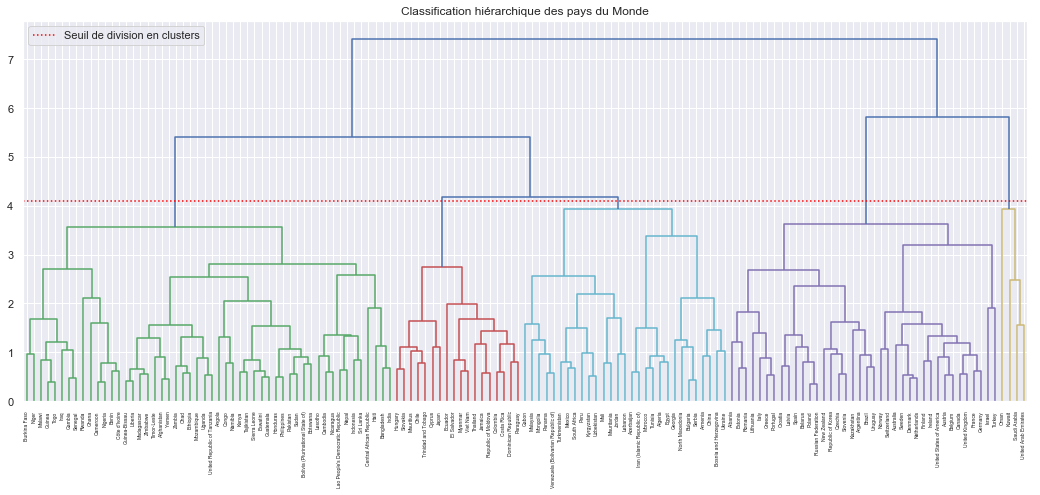

In [26]:
# Dendrogramme avec méthode complète 

# Settings
fig,ax = plt.subplots(figsize=(18, 7)) 

plt.title("Classification hiérarchique des pays du Monde")

# Threshold
seuil5 = 4.1
ax.axhline(y= seuil5, xmin=0, xmax=1,color='red',linestyle='dotted',label = 'Seuil de division en clusters')

# Plot
dend = dendrogram(Z6,labels=df.index, color_threshold=seuil5 )
plt.legend(loc = 'upper left')

# BackUp
plt.savefig('reports/Plot/dendro_full.png')

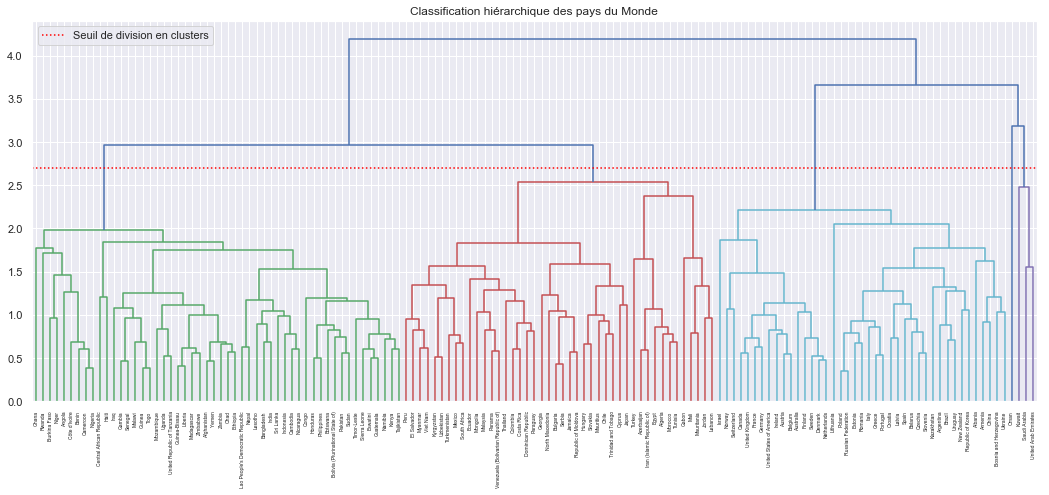

In [27]:
# Dendrogramme avec méthode moyenne  

# Settings
fig,ax = plt.subplots(figsize=(18, 7)) 

plt.title("Classification hiérarchique des pays du Monde")

# Threshold
seuil5 = 2.7
ax.axhline(y= seuil5, xmin=0, xmax=1,color='red',linestyle='dotted',label = 'Seuil de division en clusters')

# Plot
dend = dendrogram(Z5,labels=df.index, color_threshold=seuil5 )
plt.legend(loc = 'upper left')

# BackUp
plt.savefig('reports/Plot/dendro_mean.png')

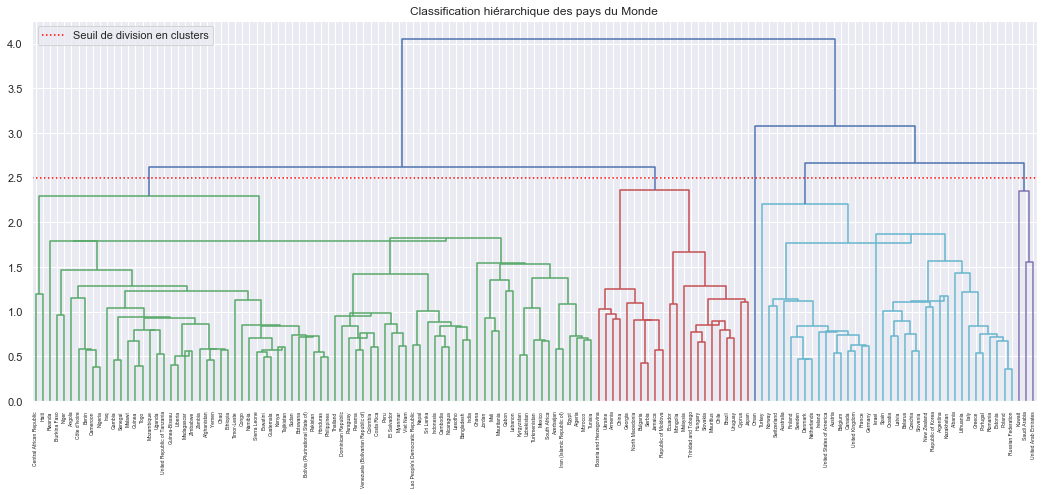

In [29]:
# Dendrogramme avec méthode mediane  

# Settings
fig,ax = plt.subplots(figsize=(18, 7)) 

plt.title("Classification hiérarchique des pays du Monde")

# Threshold
seuil5 = 2.5
ax.axhline(y= seuil5, xmin=0, xmax=1,color='red',linestyle='dotted',label = 'Seuil de division en clusters')

# Plot
dend = dendrogram(Z4,labels=df.index, color_threshold=seuil5 )
plt.legend(loc = 'upper left')

# BackUp
plt.savefig('reports/Plot/dendro_median.png')

**Avec les 3 méthodes : 4 pays se retrouvent dans des groupes isolés : Arabie Saoudite, Emirats Arabes Unis, Kuwait et Oman.**

Leur PIB/habitants étant très élevés il n'est pas étonnant qu'on les retrouve à part dans la classification.

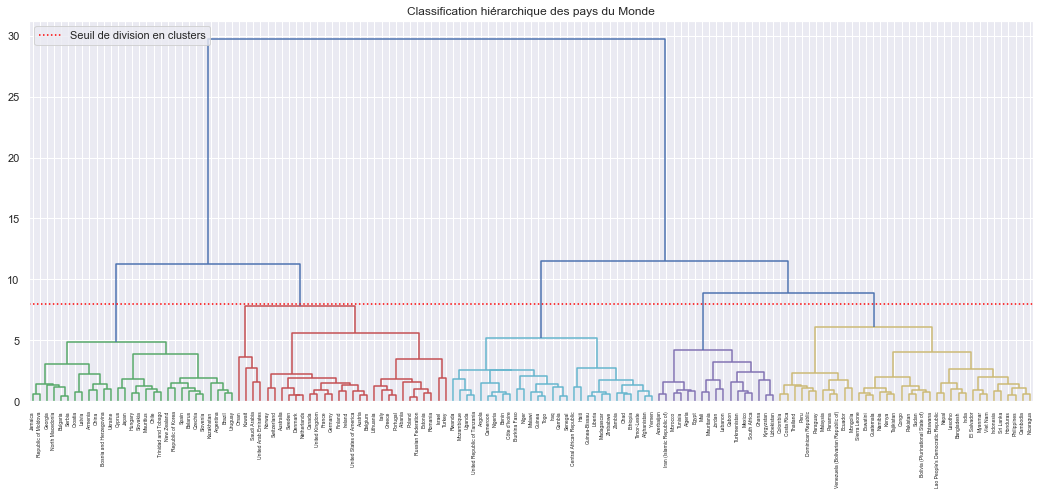

In [172]:
# Dendrogramme avec méthode Ward  

# Settings
fig,ax = plt.subplots(figsize=(18, 7)) 

plt.title("Classification hiérarchique des pays du Monde")

# Threshold
seuil5 = 8
ax.axhline(y= seuil5, xmin=0, xmax=1,color='red',linestyle='dotted',label = 'Seuil de division en clusters')

# Plot
dend = dendrogram(Z2,labels=df.index, color_threshold=seuil5 )
plt.legend(loc = 'upper left')

# BackUp
plt.savefig('reports/Livrables/dendro_ward.png')

In [31]:
# Fonction pour zoomer sur le dendrogramme et afficher les noeuds

def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']): # récupération des coordonnées x et y
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),textcoords='offset points',va='top', ha='center')

    return ddata

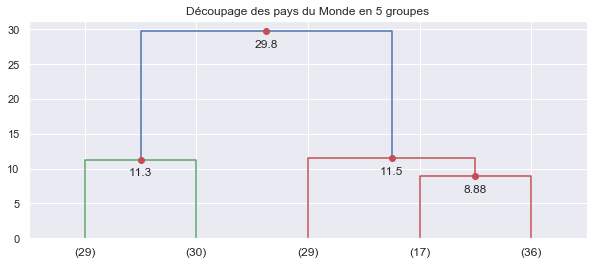

In [173]:
# Zoom sur le dendrogramme

# Plotting
plt.figure(figsize=(10, 4))

augmented_dendrogram(Z2,p=5,truncate_mode='lastp',show_leaf_counts=True) 

# Settings
plt.title("Découpage des pays du Monde en 5 groupes")

# BackUp
plt.savefig('reports/Livrables/dendro_5gp.png')

<div class="alert alert-block alert-info"> 
    
- Les groupes générés par la méthode de Ward sont de tailles plus homogènes.
- pas de singleton ou de petit groupes de quelques individus.

</div>

### Clustering final

*On choisit d'appliquer la méthode de Ward donc avec la distance Euclidienne sur les données sélectionnées pour obtenir 5 clusters.*

In [33]:
# Clusters

clusters = fcluster(Z2,5,criterion='maxclust') # Matrix clusters

clusters

array([3, 2, 4, 3, 1, 1, 2, 2, 4, 5, 1, 2, 3, 5, 1, 5, 1, 1, 3, 5, 3, 2,
       3, 3, 1, 1, 5, 5, 5, 1, 1, 1, 3, 2, 5, 5, 4, 5, 2, 5, 3, 2, 2, 4,
       3, 1, 2, 4, 2, 5, 3, 3, 3, 5, 1, 5, 5, 4, 3, 2, 2, 2, 1, 1, 4, 1,
       5, 2, 4, 5, 1, 4, 5, 3, 2, 3, 3, 5, 4, 4, 1, 4, 5, 4, 3, 5, 5, 5,
       2, 1, 5, 3, 3, 1, 2, 2, 5, 5, 5, 5, 5, 2, 2, 1, 1, 2, 2, 3, 2, 3,
       1, 5, 1, 1, 4, 1, 5, 5, 2, 2, 5, 5, 3, 3, 1, 4, 2, 4, 3, 1, 2, 2,
       3, 2, 1, 4, 5, 5, 3, 3, 3], dtype=int32)

In [34]:
# Nombres d'individus par cluster (check résultats sur dendrogramme)

idx = np.argsort(clusters) # Matrix Index

Groupe = pd.DataFrame(df.index[idx],clusters[idx])

Count = Groupe.groupby(Groupe.index).count().reset_index()
Count

,index,Country
0,1,29
1,2,30
2,3,29
3,4,17
4,5,36


# Caractéristiques des groupes

## Cluster 1

In [36]:
# Groupe 1 
gp1 = Groupe[Groupe.index == 1]['Country'].tolist()
print(gp1)

['Latvia', 'China', 'Spain', 'Croatia', 'Cyprus', 'Czechia', 'Slovenia', 'Slovakia', 'Republic of Moldova', 'Georgia', 'Republic of Korea', 'North Macedonia', 'Hungary', 'New Zealand', 'Jamaica', 'Japan', 'Kazakhstan', 'Mauritius', 'Chile', 'Trinidad and Tobago', 'Serbia', 'Belarus', 'Uruguay', 'Bulgaria', 'Argentina', 'Brazil', 'Ukraine', 'Bosnia and Herzegovina', 'Armenia']


In [37]:
# Description statistiques
temp1 = data[data.Country.isin(gp1)]
temp1.describe().iloc[1:3,1:]

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
mean,3033.689655,789.044828,87.872414,0.516489,7.085862e+07,0.004181,19930.065517,0.281374
std,193.163717,110.620295,8.515439,0.075875,2.618992e+08,0.024166,9066.273618,0.566710


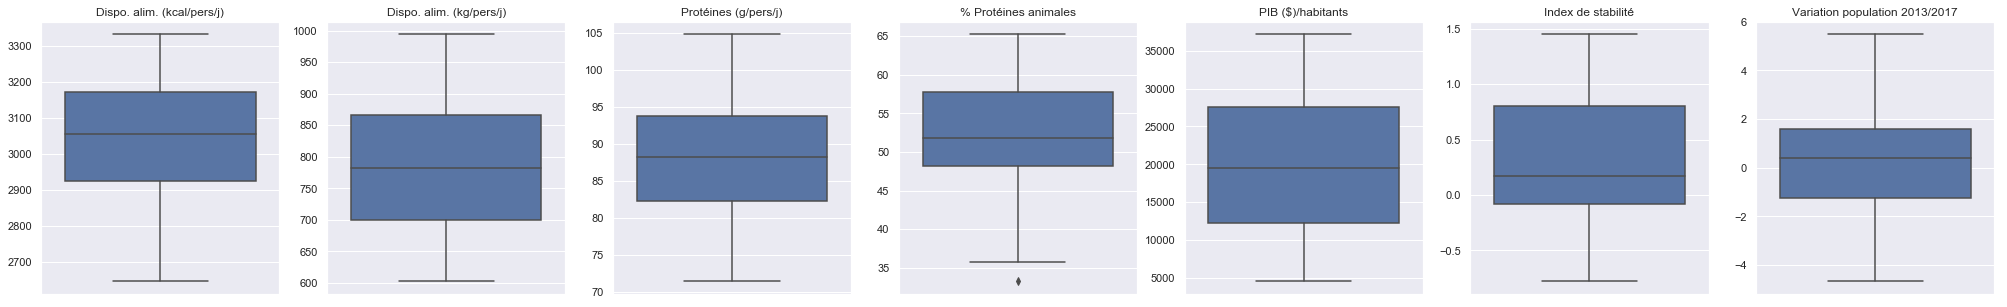

In [64]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize=(35,5))

# Data

temp = data[data.Country.isin(gp1)]

FS_kcal = temp['FS (kcal/pers/d)'].tolist()
FS_kg = temp['FS (kg/pers/d)'].tolist()
Prot = temp['ProtS (g/pers/d)'].tolist()
Prot_p = temp['%ProtA'].map(lambda x : x*100).tolist()
PIB = temp['PIB$/hab'].tolist()
Ind = temp['Ix_stab'].tolist()
Var_pop = temp['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')
sns.boxplot(y = PIB, ax=ax5).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax6).set_title('Index de stabilité')
sns.boxplot(y=Var_pop, ax=ax7).set_title('Variation population 2013/2017')


# BackUp
plt.savefig('reports/Plot/boxplot_gp1.png')
plt.show()

In [66]:
# Outliers %ProtA

temp[temp['%ProtA'] < 0.35]['Country']

39    Bosnia and Herzegovina
Name: Country, dtype: object

**1 Outlier sur %proteines animales : Bosnie Herzegovine.**

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


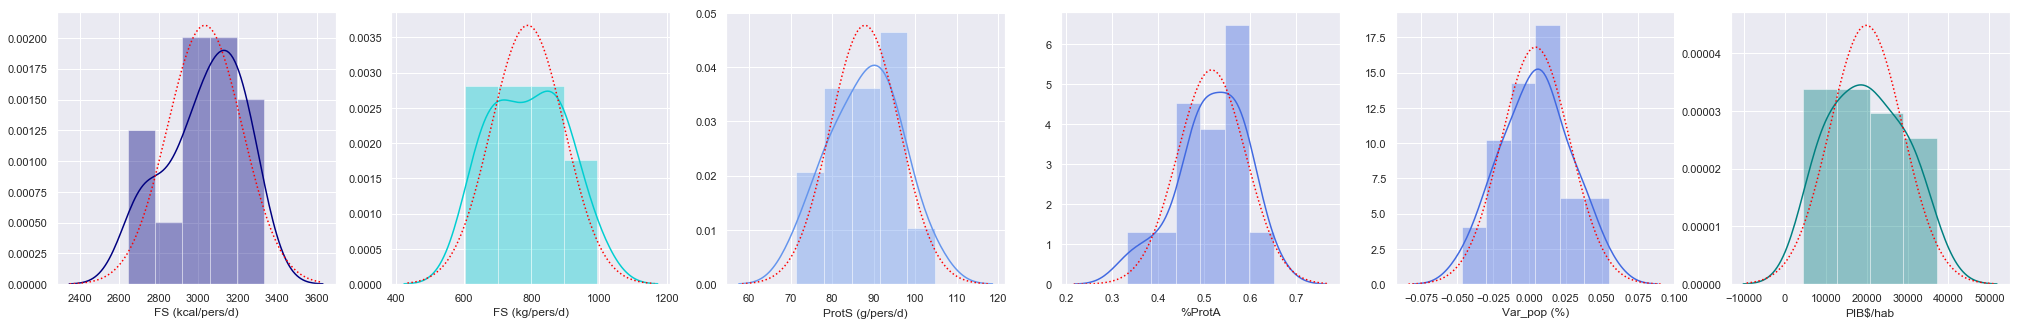

In [67]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(35,5))

# Data preparation
X0 = 'FS (kcal/pers/d)'
X1 = 'FS (kg/pers/d)'
X2 = 'ProtS (g/pers/d)'
X3 = '%ProtA'
X4 = 'Var_pop (%)'
X5 = 'PIB$/hab'

x0 = pd.Series(temp1[X0].tolist(), name=X0)
x1 = pd.Series(temp1[X1].tolist(), name=X1)
x2 = pd.Series(temp1[X2].tolist(), name=X2)
x3 = pd.Series(temp1[X3].tolist(), name=X3)
x4 = pd.Series(temp1[X4].tolist(), name=X4)
x5 = pd.Series(temp1[X5].tolist(), name=X5)

# Plot
sns.distplot(x0, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x3 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x4 , color="royalblue", ax=ax5,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x5 , color="teal", ax=ax6,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_gp1.png') 
plt.show()

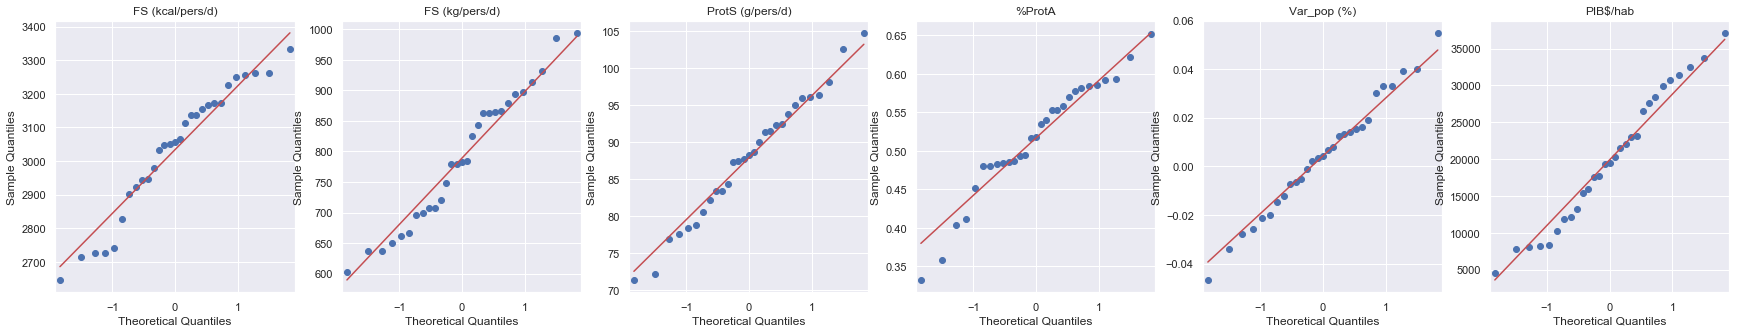

In [68]:
# QQ Plot 

#Figure
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(30,5))

# Plot
x0 = qqplot(temp1[X0], line='s', ax=ax1)
x1 = qqplot(temp1[X1], line='s', ax=ax2)
x2 = qqplot(temp1[X2], line='s', ax=ax3)
x3 = qqplot(temp1[X3], line='s', ax=ax4)
x4 = qqplot(temp1[X4], line='s', ax=ax5)
x5 = qqplot(temp1[X5], line='s', ax=ax6)

# Title
ax1.set_title(X0)
ax2.set_title(X1)
ax3.set_title(X2)
ax4.set_title(X3)
ax5.set_title(X4)
ax6.set_title(X5)

# BackUp
plt.savefig('reports/Plot/QQ_gp1.png')

<div class="alert alert-block alert-info">
<b>Tip:</b> Les variables semblent +/- suivre une loi Normale SAUF le % protéines animales. </div>

In [69]:
# Test de Shapiro-Wilk

W0, p0 = shapiro(temp1[X0])
W1, p1 = shapiro(temp1[X1])
W2, p2 = shapiro(temp1[X2])
W3, p3 = shapiro(temp1[X3])
W4, p4 = shapiro(temp1[X4])
W5, p5 = shapiro(temp1[X5])

pd.DataFrame({X0: [W0, p0], X1 :[W1,p1],X2 : [W2,p2], X3: [W3,p3],X4: [W4,p4],X5: [W5,p5]},index = ['W', 'p_value'])

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
W,0.938099,0.958314,0.982900,0.956839,0.990908,0.965567
p_value,0.089411,0.298549,0.904903,0.274141,0.995519,0.446623


<div class="alert alert-block alert-info">

Au seuil de 5%, on ne peut pas rejeter H0 : la distribution des variables suit une loi Normale.  </div> 

## Cluster 2

In [41]:
# Groupe 2 
gp2 = Groupe[Groupe.index == 2]['Country'].tolist()
print(gp2)

['United States of America', 'Greece', 'Portugal', 'Poland', 'Oman', 'Norway', 'Austria', 'Canada', 'Netherlands', 'Turkey', 'Israel', 'Italy', 'Albania', 'Kuwait', 'Australia', 'Ireland', 'Germany', 'Romania', 'Switzerland', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'Belgium', 'Lithuania', 'Denmark', 'Saudi Arabia', 'Finland', 'Russian Federation', 'France', 'Estonia']


In [140]:
# Description statistiques

temp2 = data[data.Country.isin(gp2)]
temp2.describe().iloc[1:3,1:]

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
mean,3431.266667,972.424667,106.778333,0.562346,3.598394e+07,0.028878,39023.960000,0.573333
std,169.927963,109.498868,8.175813,0.081116,6.193233e+07,0.046871,14238.735006,0.710528


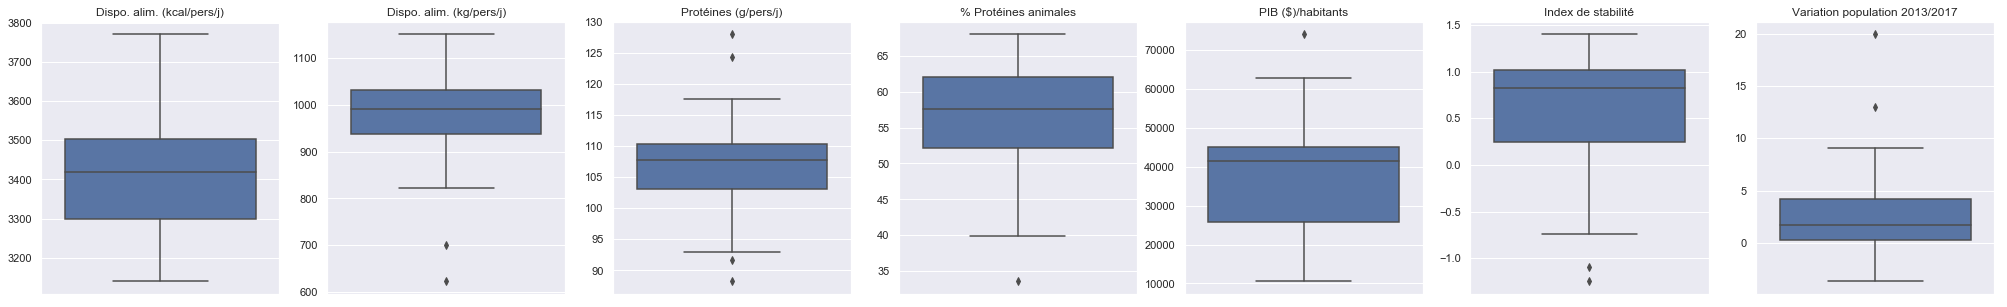

In [70]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize=(35,5))

# Data

temp = data[data.Country.isin(gp2)]

FS_kcal = temp['FS (kcal/pers/d)'].tolist()
FS_kg = temp['FS (kg/pers/d)'].tolist()
Prot = temp['ProtS (g/pers/d)'].tolist()
Prot_p = temp['%ProtA'].map(lambda x : x*100).tolist()
PIB = temp['PIB$/hab'].tolist()
Ind = temp['Ix_stab'].tolist()
Var_pop = temp['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')
sns.boxplot(y = PIB, ax=ax5).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax6).set_title('Index de stabilité')
sns.boxplot(y=Var_pop, ax=ax7).set_title('Variation population 2013/2017')


# BackUp
plt.savefig('reports/Plot/boxplot_gp2png')
plt.show()

**Outliers**

In [71]:
# Outliers sur FS en kg/pers/jour

temp[temp['FS (kg/pers/d)'] < 800]['Country']

105            Saudi Arabia
124    United Arab Emirates
Name: Country, dtype: object

In [73]:
# Outliers sur Prot en g/pers/jour

temp[temp['ProtS (g/pers/d)'] < 92]['Country']

105    Saudi Arabia
121            Oman
Name: Country, dtype: object

In [74]:
# Outliers %ProtA

temp[temp['%ProtA'] < 0.35]['Country']

123    Turkey
Name: Country, dtype: object

In [76]:
# Outliers PIB

temp[temp['PIB$/hab'] > 70000]['Country']

64    Kuwait
Name: Country, dtype: object

In [77]:
# Outliers PIB

temp[temp['Ix_stab'] < -1]['Country']

53     Israel
123    Turkey
Name: Country, dtype: object

In [78]:
# Outliers variation population

temp[temp['Var_pop (%)'] > 0.12]['Country']

64     Kuwait
121      Oman
Name: Country, dtype: object

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


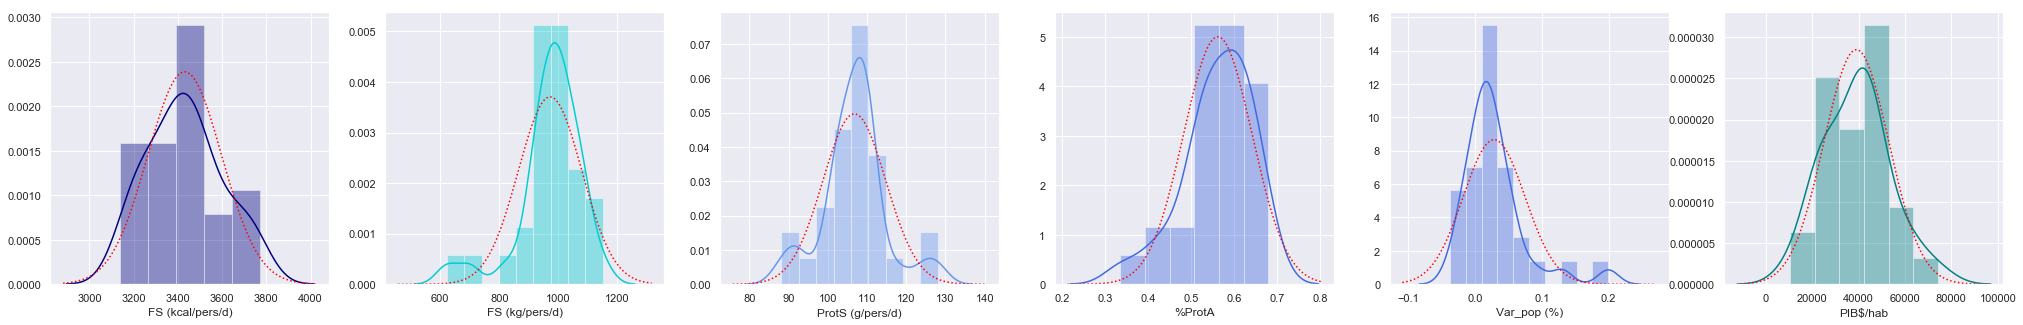

In [43]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(35,5))

# Data preparation
x0 = pd.Series(temp2[X0].tolist(), name=X0)
x1 = pd.Series(temp2[X1].tolist(), name=X1)
x2 = pd.Series(temp2[X2].tolist(), name=X2)
x3 = pd.Series(temp2[X3].tolist(), name=X3)
x4 = pd.Series(temp2[X4].tolist(), name=X4)
x5 = pd.Series(temp2[X5].tolist(), name=X5)

# Plot
sns.distplot(x0, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x3 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x4 , color="royalblue", ax=ax5,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x5 , color="teal", ax=ax6,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_gp2.png') 
plt.show()

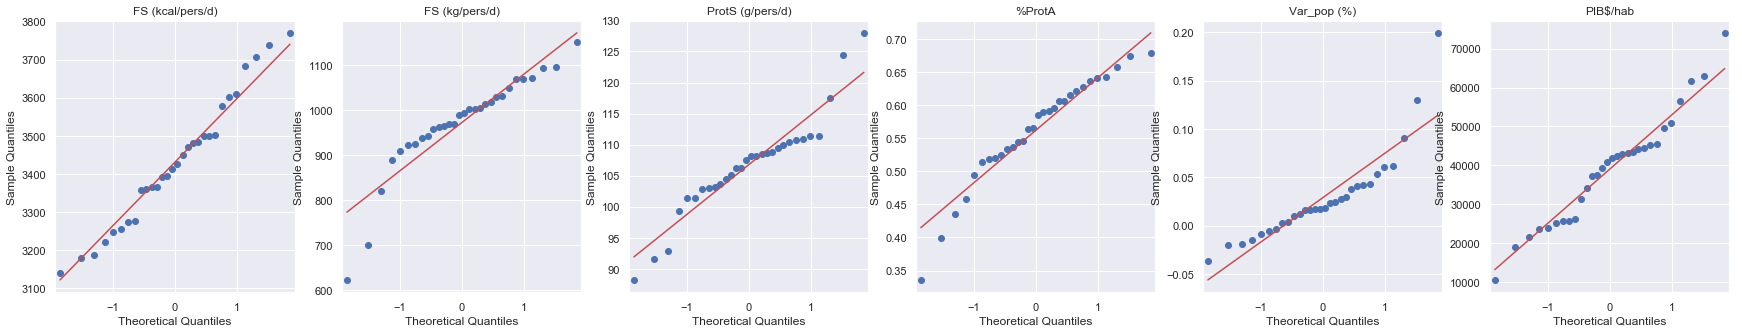

In [44]:
# QQ Plot 

#Figure
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(30,5))

# Plot
x0 = qqplot(temp2[X0], line='s', ax=ax1)
x1 = qqplot(temp2[X1], line='s', ax=ax2)
x2 = qqplot(temp2[X2], line='s', ax=ax3)
x3 = qqplot(temp2[X3], line='s', ax=ax4)
x4 = qqplot(temp2[X4], line='s', ax=ax5)
x5 = qqplot(temp2[X5], line='s', ax=ax6)

# Title
ax1.set_title(X0)
ax2.set_title(X1)
ax3.set_title(X2)
ax4.set_title(X3)
ax5.set_title(X4)
ax6.set_title(X5)

# BackUp
plt.savefig('reports/Plot/QQ_gp2.png')

<div class="alert alert-block alert-info">
<b>Tip:</b> Les variables semblent +/- suivre une loi Normale. </div>

In [45]:
# Test de Shapiro-Wilk

W0, p0 = shapiro(temp2[X0])
W1, p1 = shapiro(temp2[X1])
W2, p2 = shapiro(temp2[X2])
W3, p3 = shapiro(temp2[X3])
W4, p4 = shapiro(temp2[X4])
W5, p5 = shapiro(temp2[X5])

pd.DataFrame({X0: [W0, p0], X1 :[W1,p1],X2 : [W2,p2], X3: [W3,p3],X4: [W4,p4],X5: [W5,p5]},index = ['W', 'p_value'])

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
W,0.970632,0.877960,0.933523,0.942029,0.832263,0.970535
p_value,0.556609,0.002532,0.060950,0.103164,0.000269,0.553907


<div class="alert alert-block alert-info">
    
Au seuil de 5%, on ne peut pas rejeter H0 : la distribution des variables  FS en kcal/pers/jour,Prot en g/pers/j, %ProtA et PIB/habitants suit une loi Normale. Pour les autres variables, pas de distribution normale au seuil de 5%. </div> 

## Cluster 3

In [46]:
# Groupe 3 
gp3 = Groupe[Groupe.index == 3]['Country'].tolist()
print(gp3)

['United Republic of Tanzania', 'Rwanda', 'Niger', 'Nigeria', 'Senegal', 'Uganda', 'Mozambique', 'Yemen', 'Timor-Leste', 'Togo', 'Malawi', 'Madagascar', 'Liberia', 'Afghanistan', 'Ethiopia', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', "Côte d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Zimbabwe', 'Zambia']


In [47]:
# Description statistiques

temp3 = data[data.Country.isin(gp3)]
temp3.describe().iloc[1:3,1:]

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
mean,2330.413793,478.283793,57.719655,0.202756,2.545670e+07,0.101492,2780.910345,-0.824483
std,255.371650,128.128928,9.615679,0.061692,3.362975e+07,0.020724,2979.706375,0.791651


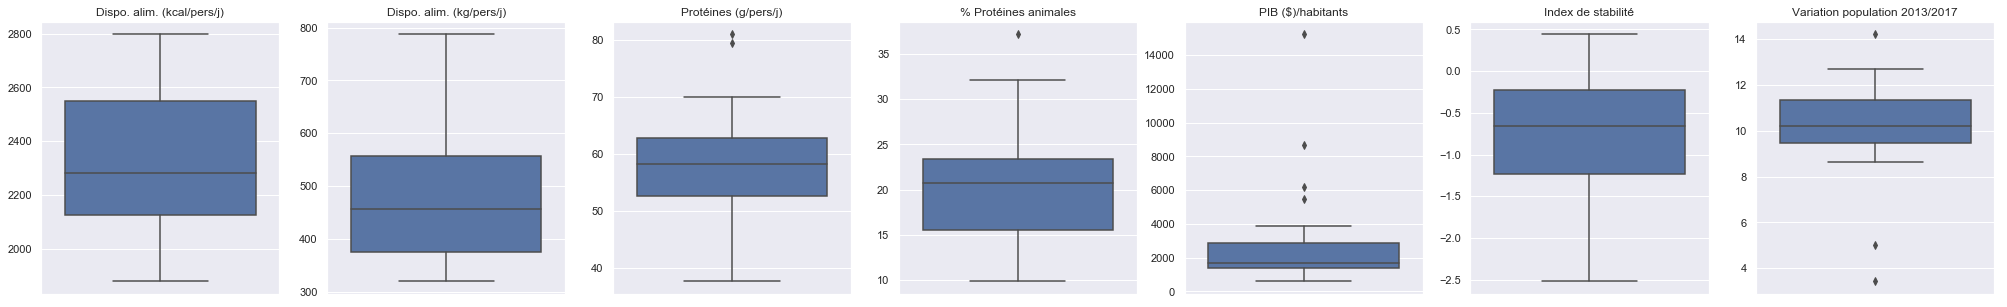

In [81]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize=(35,5))

# Data

temp = data[data.Country.isin(gp3)]

FS_kcal = temp['FS (kcal/pers/d)'].tolist()
FS_kg = temp['FS (kg/pers/d)'].tolist()
Prot = temp['ProtS (g/pers/d)'].tolist()
Prot_p = temp['%ProtA'].map(lambda x : x*100).tolist()
PIB = temp['PIB$/hab'].tolist()
Ind = temp['Ix_stab'].tolist()
Var_pop = temp['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')
sns.boxplot(y = PIB, ax=ax5).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax6).set_title('Index de stabilité')
sns.boxplot(y=Var_pop, ax=ax7).set_title('Variation population 2013/2017')


# BackUp
plt.savefig('reports/Plot/boxplot_gp2png')
plt.show()

**Outliers**

In [83]:
# Outliers sur Prot en g/pers/jour

temp[temp['ProtS (g/pers/d)'] > 75]['Country']

88            Niger
129    Burkina Faso
Name: Country, dtype: object

In [84]:
# Outliers %ProtA

temp[temp['%ProtA'] > 0.35]['Country']

16    Central African Republic
Name: Country, dtype: object

In [85]:
# Outliers PIB

temp[temp['PIB$/hab'] > 4500]['Country']

4           Angola
51            Iraq
89         Nigeria
100    Timor-Leste
Name: Country, dtype: object

In [77]:
# Outliers index stabilite

temp[temp['Ix_stab'] < -1]['Country']

53     Israel
123    Turkey
Name: Country, dtype: object

In [86]:
# Outliers variation population

temp[(temp['Var_pop (%)'] > 0.14) | (temp['Var_pop (%)'] < 0.06) ]['Country']

16    Central African Republic
44                       Haiti
88                       Niger
Name: Country, dtype: object

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


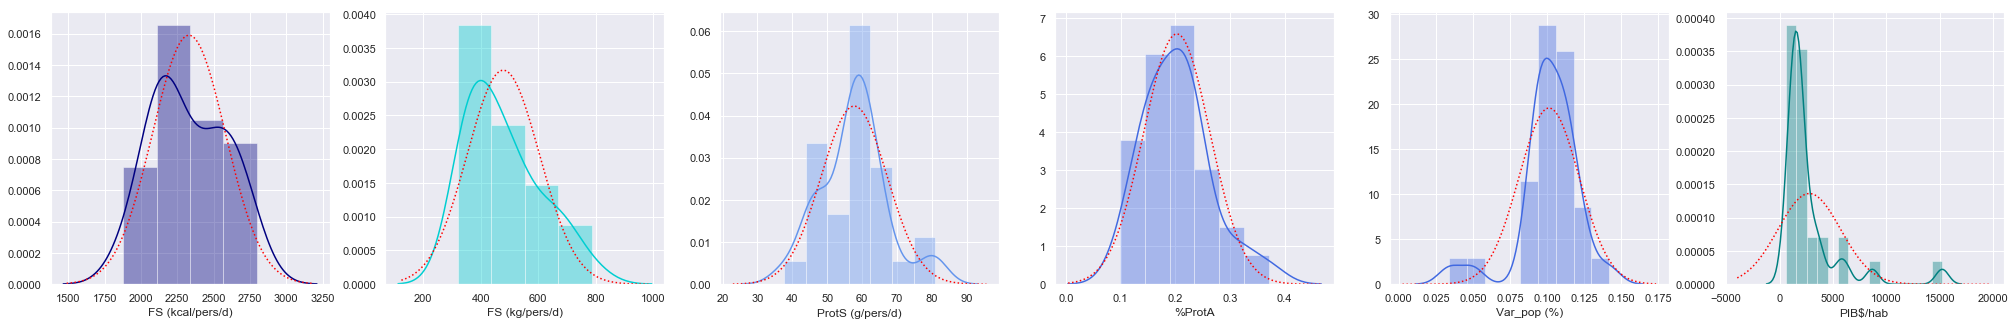

In [48]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(35,5))

# Data preparation
x0 = pd.Series(temp3[X0].tolist(), name=X0)
x1 = pd.Series(temp3[X1].tolist(), name=X1)
x2 = pd.Series(temp3[X2].tolist(), name=X2)
x3 = pd.Series(temp3[X3].tolist(), name=X3)
x4 = pd.Series(temp3[X4].tolist(), name=X4)
x5 = pd.Series(temp3[X5].tolist(), name=X5)

# Plot
sns.distplot(x0, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x3 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x4 , color="royalblue", ax=ax5,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x5 , color="teal", ax=ax6,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_gp3.png') 
plt.show()

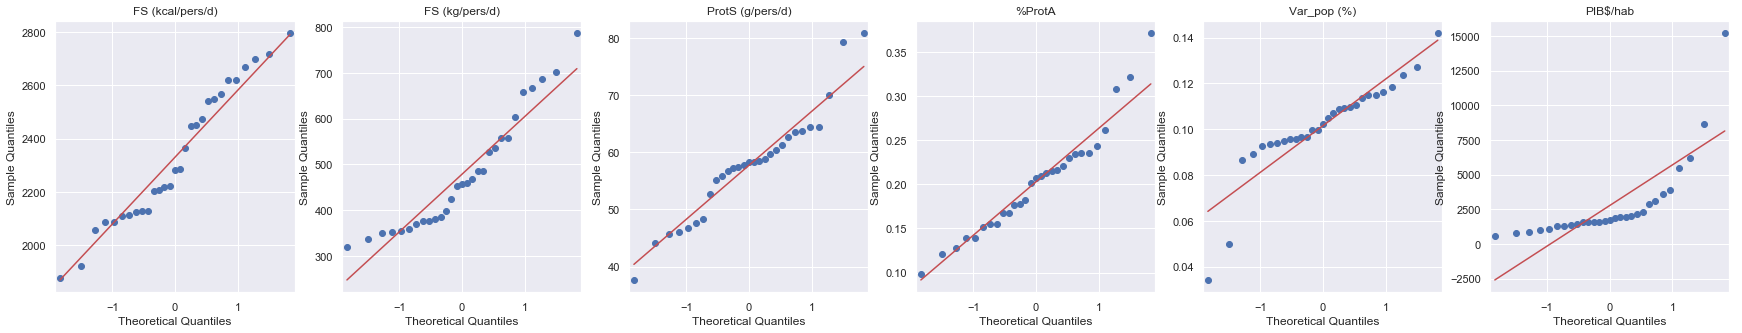

In [49]:
# QQ Plot 

#Figure
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(30,5))

# Plot
x0 = qqplot(temp3[X0], line='s', ax=ax1)
x1 = qqplot(temp3[X1], line='s', ax=ax2)
x2 = qqplot(temp3[X2], line='s', ax=ax3)
x3 = qqplot(temp3[X3], line='s', ax=ax4)
x4 = qqplot(temp3[X4], line='s', ax=ax5)
x5 = qqplot(temp3[X5], line='s', ax=ax6)

# Title
ax1.set_title(X0)
ax2.set_title(X1)
ax3.set_title(X2)
ax4.set_title(X3)
ax5.set_title(X4)
ax6.set_title(X5)

# BackUp
plt.savefig('reports/Plot/QQ_gp3.png')

<div class="alert alert-block alert-info">
<b>Tip:</b> Les variables semblent +/- suivre une loi Normale SAUF le PIB/habitants.</div>

In [50]:
# Test de Shapiro-Wilk

W0, p0 = shapiro(temp3[X0])
W1, p1 = shapiro(temp3[X1])
W2, p2 = shapiro(temp3[X2])
W3, p3 = shapiro(temp3[X3])
W4, p4 = shapiro(temp3[X4])
W5, p5 = shapiro(temp3[X5])

pd.DataFrame({X0: [W0, p0], X1 :[W1,p1],X2 : [W2,p2], X3: [W3,p3],X4: [W4,p4],X5: [W5,p5]},
             index = ['W', 'p_value'])

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
W,0.948728,0.907657,0.951077,0.951253,0.863670,6.159519e-01
p_value,0.169622,0.015016,0.195203,0.197256,0.001472,1.606595e-07


<div class="alert alert-block alert-info">

Au seuil de 5%, on ne peut pas rejeter H0 : la distribution des variables  FS en kcal/pers/jour,Prot en g/pers/j et %ProtA suit une loi Normale. Pour les autres variables, pas de distribution normale au seuil de 5%.</div>

## Cluster 4

In [51]:
# Groupe 4 
gp4 = Groupe[Groupe.index == 4]['Country'].tolist()
print(gp4)

['Lebanon', 'South Africa', 'Mauritania', 'Mali', 'Egypt', 'Tunisia', 'Gabon', 'Mexico', 'Ghana', 'Turkmenistan', 'Kyrgyzstan', 'Uzbekistan', 'Algeria', 'Azerbaijan', 'Morocco', 'Jordan', 'Iran (Islamic Republic of)']


In [52]:
# Description statistiques

temp4 = data[data.Country.isin(gp4)]
temp4.describe().iloc[1:3,1:]

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
mean,3060.235294,723.678824,87.288824,0.346412,3.173272e+07,0.076715,10152.641176,-0.734706
std,222.517564,118.435963,8.756263,0.078733,3.510519e+07,0.030223,5258.752525,0.649126


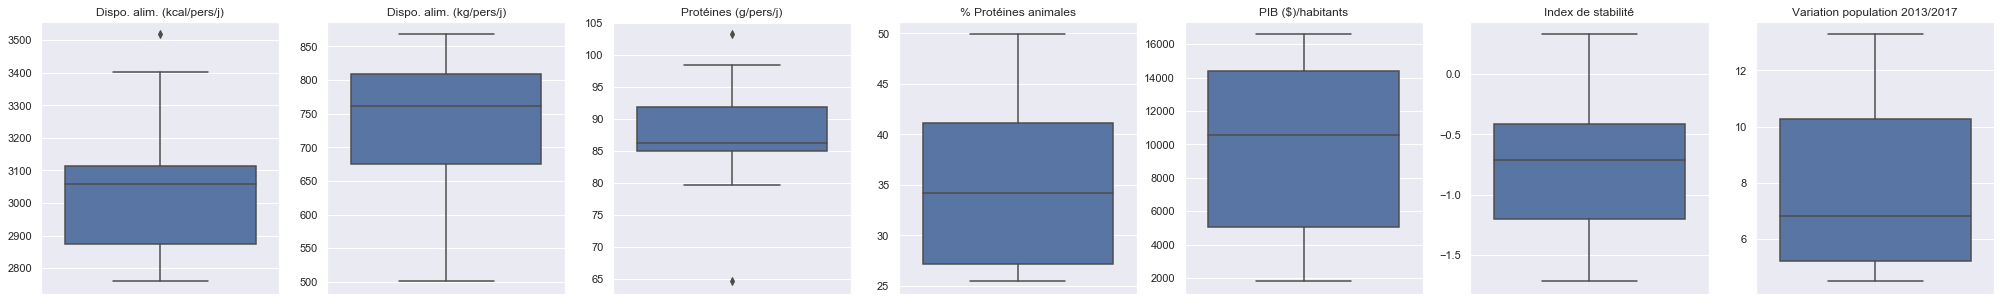

In [87]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize=(35,5))

# Data

temp = data[data.Country.isin(gp4)]

FS_kcal = temp['FS (kcal/pers/d)'].tolist()
FS_kg = temp['FS (kg/pers/d)'].tolist()
Prot = temp['ProtS (g/pers/d)'].tolist()
Prot_p = temp['%ProtA'].map(lambda x : x*100).tolist()
PIB = temp['PIB$/hab'].tolist()
Ind = temp['Ix_stab'].tolist()
Var_pop = temp['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')
sns.boxplot(y = PIB, ax=ax5).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax6).set_title('Index de stabilité')
sns.boxplot(y=Var_pop, ax=ax7).set_title('Variation population 2013/2017')


# BackUp
plt.savefig('reports/Plot/boxplot_gp2png')
plt.show()

**Outliers**

In [88]:
# Outliers sur FS en kg/pers/jour

temp[temp['FS (kcal/pers/d)'] > 3450]['Country']

30    Egypt
Name: Country, dtype: object

In [89]:
# Outliers sur Prot en g/pers/jour

temp[(temp['ProtS (g/pers/d)'] > 100) |(temp['ProtS (g/pers/d)'] < 70)]['Country']

30    Egypt
40    Ghana
Name: Country, dtype: object

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


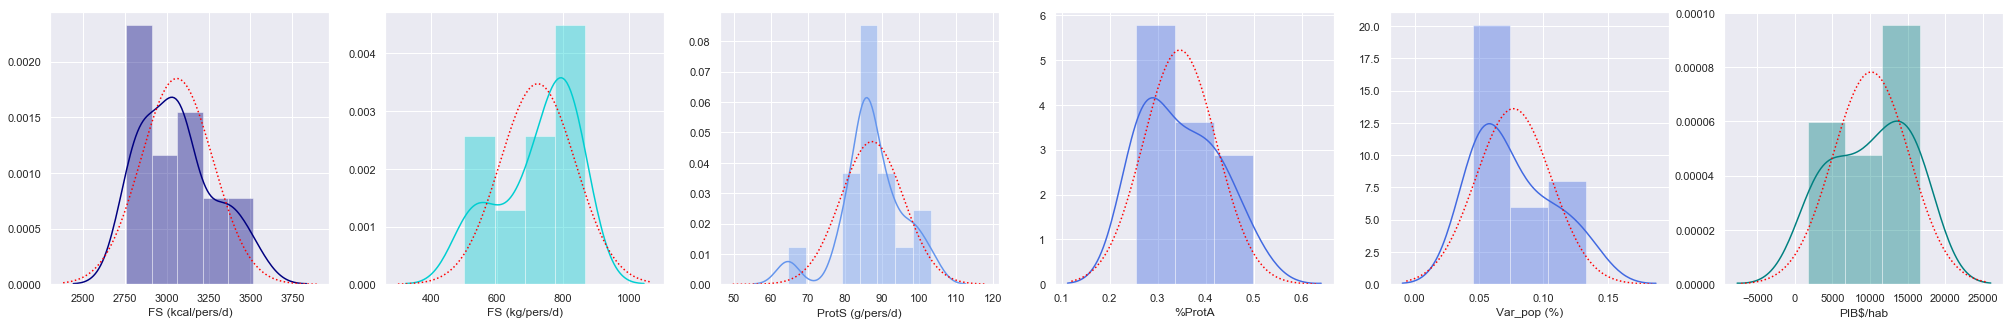

In [53]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(35,5))

# Data preparation
x0 = pd.Series(temp4[X0].tolist(), name=X0)
x1 = pd.Series(temp4[X1].tolist(), name=X1)
x2 = pd.Series(temp4[X2].tolist(), name=X2)
x3 = pd.Series(temp4[X3].tolist(), name=X3)
x4 = pd.Series(temp4[X4].tolist(), name=X4)
x5 = pd.Series(temp4[X5].tolist(), name=X5)

# Plot
sns.distplot(x0, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x3 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x4 , color="royalblue", ax=ax5,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x5 , color="teal", ax=ax6,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_gp4.png') 
plt.show()

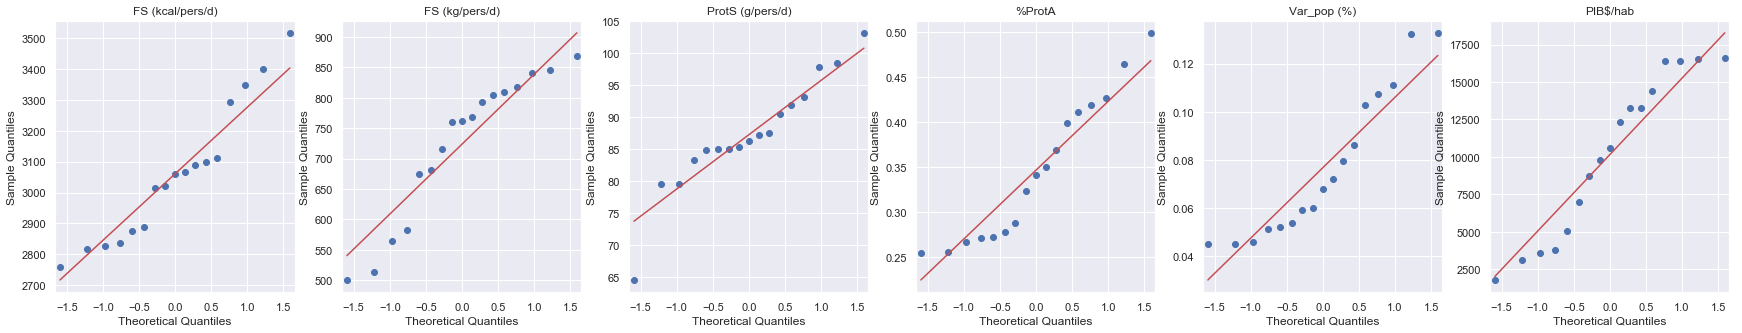

In [54]:
# QQ Plot 

#Figure
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(30,5))

# Plot
x0 = qqplot(temp4[X0], line='s', ax=ax1)
x1 = qqplot(temp4[X1], line='s', ax=ax2)
x2 = qqplot(temp4[X2], line='s', ax=ax3)
x3 = qqplot(temp4[X3], line='s', ax=ax4)
x4 = qqplot(temp4[X4], line='s', ax=ax5)
x5 = qqplot(temp4[X5], line='s', ax=ax6)

# Title
ax1.set_title(X0)
ax2.set_title(X1)
ax3.set_title(X2)
ax4.set_title(X3)
ax5.set_title(X4)
ax6.set_title(X5)

# BackUp
plt.savefig('reports/Plot/QQ_gp4.png')

In [55]:
# Test de Shapiro-Wilk

W0, p0 = shapiro(temp4[X0])
W1, p1 = shapiro(temp4[X1])
W2, p2 = shapiro(temp4[X2])
W3, p3 = shapiro(temp4[X3])
W4, p4 = shapiro(temp4[X4])
W5, p5 = shapiro(temp4[X5])

pd.DataFrame({X0: [W0, p0], X1 :[W1,p1],X2 : [W2,p2], X3: [W3,p3],X4: [W4,p4],X5: [W5,p5]},index = ['W', 'p_value'])

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
W,0.931546,0.892718,0.934896,0.914777,0.878767,0.905679
p_value,0.230972,0.051380,0.262527,0.120484,0.030369,0.084588


<div class="alert alert-block alert-info">

Au seuil de 5%, on ne peut pas rejeter H0 : la distribution des variables suit une loi Normale SAUF pour la variation de la population. </div>

## Cluster 5

In [56]:
# Groupe 5 
gp5 = Groupe[Groupe.index == 5]['Country'].tolist()
print(gp5)

['Tajikistan', 'Thailand', 'Viet Nam', 'Venezuela (Bolivarian Republic of)', 'Bolivia (Plurinational State of)', "Lao People's Democratic Republic", 'Cambodia', 'Bangladesh', 'Colombia', 'Botswana', 'Malaysia', 'Congo', 'Nepal', 'Sri Lanka', 'Myanmar', 'Nicaragua', 'Indonesia', 'India', 'Honduras', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Sudan', 'Philippines', 'Guatemala', 'Lesotho', 'Eswatini', 'El Salvador', 'Ecuador', 'Sierra Leone', 'Dominican Republic', 'Namibia', 'Costa Rica', 'Mongolia', 'Kenya']


In [57]:
# Description statistiques

temp5 = data[data.Country.isin(gp5)]
temp5.describe().iloc[1:3,1:]

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
mean,2522.500000,543.677500,66.785556,0.374143,7.187352e+07,0.057241,8144.630556,-0.555560
std,198.051869,78.101852,8.142638,0.121626,2.142356e+08,0.021114,5306.808726,0.775201


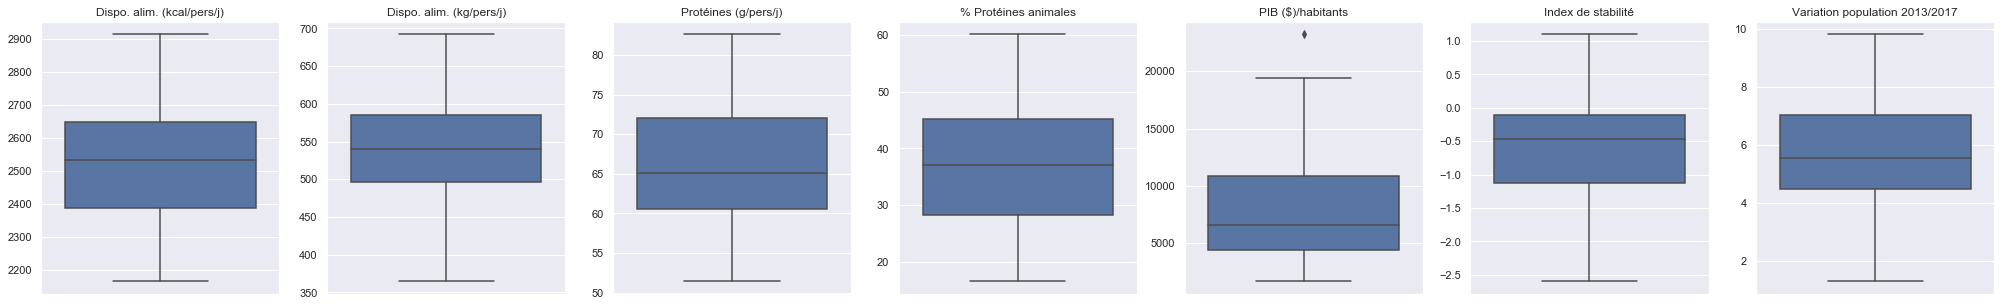

In [90]:
# Box Plot

#Figure
fig, (ax1, ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,figsize=(35,5))

# Data

temp = data[data.Country.isin(gp5)]

FS_kcal = temp['FS (kcal/pers/d)'].tolist()
FS_kg = temp['FS (kg/pers/d)'].tolist()
Prot = temp['ProtS (g/pers/d)'].tolist()
Prot_p = temp['%ProtA'].map(lambda x : x*100).tolist()
PIB = temp['PIB$/hab'].tolist()
Ind = temp['Ix_stab'].tolist()
Var_pop = temp['Var_pop (%)'].map(lambda x : x*100).tolist()

# Plot 
sns.boxplot(y = FS_kcal, ax=ax1).set_title('Dispo. alim. (kcal/pers/j)')
sns.boxplot(y=FS_kg, ax=ax2).set_title('Dispo. alim. (kg/pers/j)')
sns.boxplot(y = Prot, ax=ax3).set_title('Protéines (g/pers/j)')
sns.boxplot(y=Prot_p, ax=ax4).set_title('% Protéines animales')
sns.boxplot(y = PIB, ax=ax5).set_title('PIB ($)/habitants')
sns.boxplot(y=Ind, ax=ax6).set_title('Index de stabilité')
sns.boxplot(y=Var_pop, ax=ax7).set_title('Variation population 2013/2017')


# BackUp
plt.savefig('reports/Plot/boxplot_gp2png')
plt.show()

**Outliers**

In [91]:
# Outliers PIB

temp[temp['PIB$/hab'] > 20000]['Country']

73    Malaysia
Name: Country, dtype: object

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


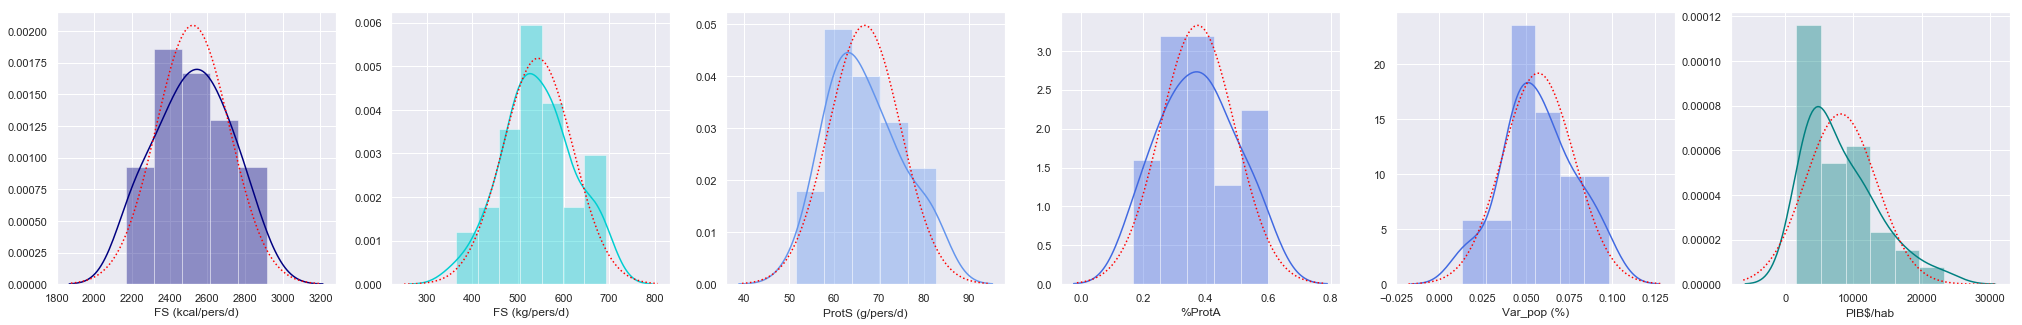

In [58]:
# Histogrammes 

#Figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(35,5))

x0 = pd.Series(temp5[X0].tolist(), name=X0)
x1 = pd.Series(temp5[X1].tolist(), name=X1)
x2 = pd.Series(temp5[X2].tolist(), name=X2)
x3 = pd.Series(temp5[X3].tolist(), name=X3)
x4 = pd.Series(temp5[X4].tolist(), name=X4)
x5 = pd.Series(temp5[X5].tolist(), name=X5)

# Plot
sns.distplot(x0, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x3 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x4 , color="royalblue", ax=ax5,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x5 , color="teal", ax=ax6,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

# BackUp
plt.savefig('reports/Plot/Hist_gp5.png') 
plt.show()

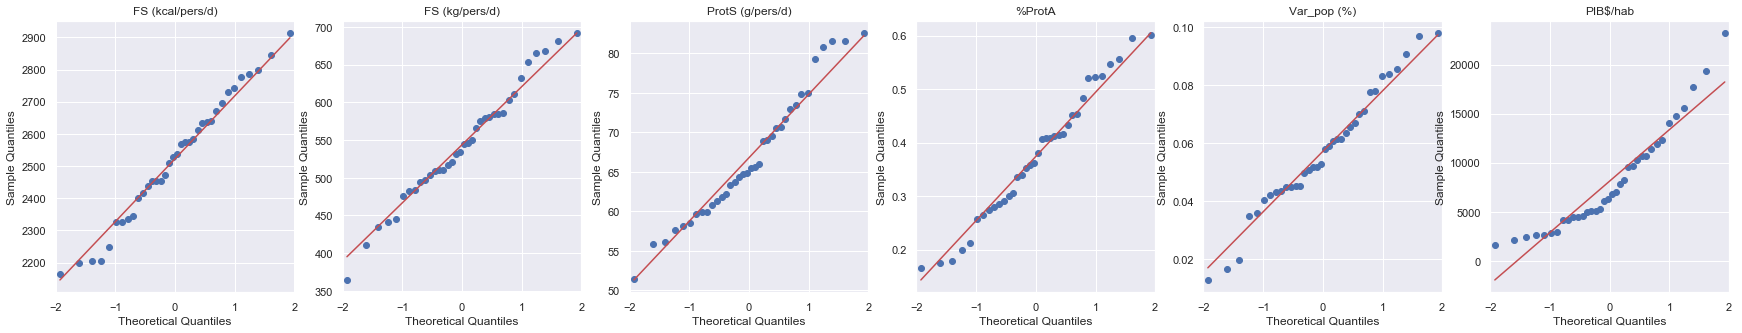

In [59]:
# QQ Plot 

#Figure
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(30,5))

# Plot
x0 = qqplot(temp5[X0], line='s', ax=ax1)
x1 = qqplot(temp5[X1], line='s', ax=ax2)
x2 = qqplot(temp5[X2], line='s', ax=ax3)
x3 = qqplot(temp5[X3], line='s', ax=ax4)
x4 = qqplot(temp5[X4], line='s', ax=ax5)
x5 = qqplot(temp5[X5], line='s', ax=ax6)

# Title
ax1.set_title(X0)
ax2.set_title(X1)
ax3.set_title(X2)
ax4.set_title(X3)
ax5.set_title(X4)
ax6.set_title(X5)

# BackUp
plt.savefig('reports/Plot/QQ_gp5.png')

<div class="alert alert-block alert-info">
<b>Tip:</b> Les variables semblent +/- suivre une loi Normale SAUF le PIB/habitants.</div>

In [60]:
# Test de Shapiro-Wilk

W0, p0 = shapiro(temp5[X0])
W1, p1 = shapiro(temp5[X1])
W2, p2 = shapiro(temp5[X2])
W3, p3 = shapiro(temp5[X3])
W4, p4 = shapiro(temp5[X4])
W5, p5 = shapiro(temp5[X5])

pd.DataFrame({X0: [W0, p0], X1 :[W1,p1],X2 : [W2,p2], X3: [W3,p3],X4: [W4,p4],X5: [W5,p5]},index = ['W', 'p_value'])

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab
W,0.977435,0.984066,0.959591,0.970292,0.976518,0.907702
p_value,0.658283,0.871880,0.208810,0.433560,0.627209,0.005579


<div class="alert alert-block alert-info">

Au seuil de 5%, on ne peut pas rejeter H0 : la distribution des variables suit une loi Normale SAUF le PIB/habitants. </div>

## Comparaison des clusters

### Descriptive

In [92]:
# Moyenne des groupes par ordre décroissant de FS (kcal/pers/d) 

tab1 = temp1.describe().iloc[1:3,1:]
tab2 = temp2.describe().iloc[1:3,1:]
tab3 = temp3.describe().iloc[1:3,1:]
tab4 = temp4.describe().iloc[1:3,1:]
tab5 = temp5.describe().iloc[1:3,1:]

mean_cluster = pd.DataFrame({1:tab1.iloc[0],2:tab2.iloc[0],3:tab3.iloc[0],4:tab4.iloc[0],5:tab5.iloc[0]})

mean_cluster = mean_cluster.T.sort_values(by='FS (kcal/pers/d)', ascending=False)
mean_cluster

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
2,3431.266667,972.424667,106.778333,0.562346,3.598394e+07,0.028878,39023.960000,0.573333
4,3060.235294,723.678824,87.288824,0.346412,3.173272e+07,0.076715,10152.641176,-0.734706
1,3033.689655,789.044828,87.872414,0.516489,7.085862e+07,0.004181,19930.065517,0.281374
5,2522.500000,543.677500,66.785556,0.374143,7.187352e+07,0.057241,8144.630556,-0.555560
3,2330.413793,478.283793,57.719655,0.202756,2.545670e+07,0.101492,2780.910345,-0.824483


In [457]:
# Variance des groupes

var_cluster = pd.DataFrame({'var1':tab1.iloc[1],'var2':tab2.iloc[1],'var3':tab3.iloc[1],
                             'var4':tab4.iloc[1],'var5':tab5.iloc[1]})
var_cluster.T

,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
var1,193.163717,110.620295,8.515439,0.075875,2.618992e+08,0.024166,9066.273618,0.566710
var2,169.927963,109.498868,8.175813,0.081116,6.193233e+07,0.046871,14238.735006,0.710528
var3,255.371650,128.128928,9.615679,0.061692,3.362975e+07,0.020724,2979.706375,0.791651
var4,222.517564,118.435963,8.756263,0.078733,3.510519e+07,0.030223,5258.752525,0.649126
var5,198.051869,78.101852,8.142638,0.121626,2.142356e+08,0.021114,5306.808726,0.775201


<div class="alert alert-block alert-info">

Le groupe 2 est celui qui a les ressources alimentaires les plus abondantes et qui consomme en moyenne le plus de protéines notamment d'origine animale. Sa démographie est relativement stable et il a le plus fort PIB/hab et indice de stabilité.
    
</div>

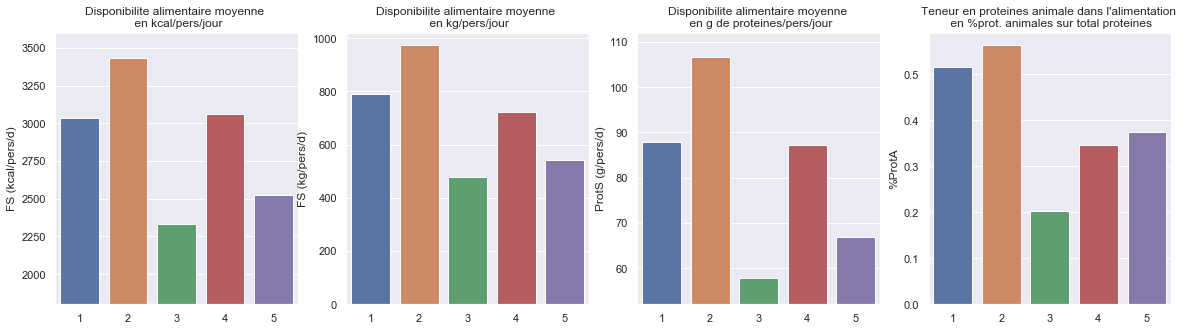

In [93]:
# Ressources alimentaires par groupes

fig, (ax1, ax2,ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

# Plot
X = mean_cluster.index.values

sns.barplot(x=X, y='FS (kcal/pers/d)',data = mean_cluster, ax=ax1)
sns.barplot(x=X, y='FS (kg/pers/d)',data = mean_cluster, ax=ax2)
sns.barplot(x=X, y='ProtS (g/pers/d)',data = mean_cluster, ax=ax3)
sns.barplot(x=X, y='%ProtA',data = mean_cluster, ax=ax4)

# Title
ax1.set_title('Disponibilite alimentaire moyenne \n en kcal/pers/jour')
ax2.set_title('Disponibilite alimentaire moyenne \n en kg/pers/jour')
ax3.set_title('Disponibilite alimentaire moyenne \n en g de proteines/pers/jour')
ax4.set_title('Teneur en proteines animale dans l\'alimentation \n en %prot. animales sur total proteines')

# Set axis
ax1.set_ylim(bottom=1800) # recommendations FAO calories mini / pers/jour
ax3.set_ylim(bottom = 52) # recommendations gr de prot min / pers/ j

# BackUp
plt.savefig('reports/Plot/CAH_groupe_food.png')

<div class="alert alert-block alert-info"> 

- On observe visuellement 2 groupes intéressants pour le développement du Marché : groupe 1 et 2. Les pays de ces groupes ont un régime alimentaire riche avec de fortes teneur en protéines notamment d'origine animale.

- On constate que les groupes 1 et 4 ont des valeurs relativement proches selon la variable observée. 

</div>

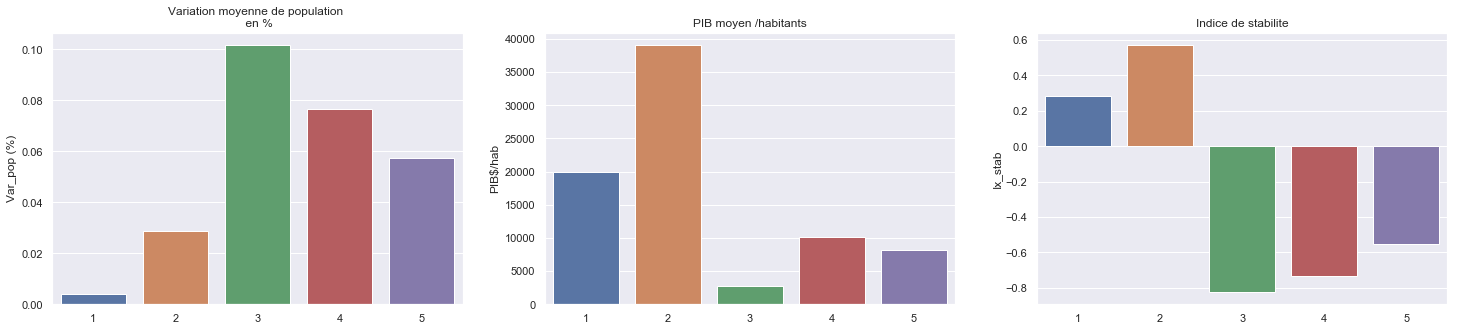

In [94]:
# Démographie et économie

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,5))

# Plot
sns.barplot(x=X, y=mean_cluster.iloc[:,5],ax=ax1)
sns.barplot(x=X, y=mean_cluster.iloc[:,6],ax=ax2)
sns.barplot(x=X, y=mean_cluster.iloc[:,7],ax=ax3)

# Title
ax1.set_title('Variation moyenne de population \n en %')
ax2.set_title('PIB moyen /habitants')
ax3.set_title('Indice de stabilite')

# BackUp
plt.savefig('reports/Plot/eco.png')

<div class="alert alert-block alert-info"> 
    
- Le groupe 2 est le plus intéressant: sa démographie est stable, il a le plus fort PIB et un indice de stabilité positif.

- Le groupe 1 pourrait aussi être un candidat intéressant pour le développement du Marché. </div>

*Les groupes sont-ils bien différents ?*

### Egalité des variances

**Test d'égalité des variances**

Cas de 2 échantillons Gaussien :
    
- Echantillon 1 --> loi Normale (μ1, σ1)
- Echantillon 2 --> loi Normale (μ2, σ2)

Hypothèses des tests :
- H0 : σ1 = σ2
- H1 : σ1 ≠ σ2

- risque de première espèce : alpha = 5%

La normalité des variables étant vérifiée on peut choisir d'appliquer un test de Bartlett.
**On utilise la FS en kcal/pers/jour car la distribution de la variable est toujours Normale quelque soit le cluster.**

In [98]:
# Recup Groupes

gp1 = Groupe[Groupe.index == 1]['Country'].tolist()
gp2 = Groupe[Groupe.index == 2]['Country'].tolist()
gp3 = Groupe[Groupe.index == 3]['Country'].tolist()
gp4 = Groupe[Groupe.index == 4]['Country'].tolist()
gp5 = Groupe[Groupe.index == 5]['Country'].tolist()

temp1 = data[data.Country.isin(gp1)]
temp2 = data[data.Country.isin(gp2)]
temp3 = data[data.Country.isin(gp3)]
temp4 = data[data.Country.isin(gp4)]
temp5 = data[data.Country.isin(gp5)]

In [99]:
# Test de Bartlett - Cluster 1

T2, p2 = bartlett(temp1['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = bartlett(temp1['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T4, p4 = bartlett(temp1['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = bartlett(temp1['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)'])

pd.DataFrame({'2' : [T2,p2], '3': [T3,p3],'4': [T4,p4],'5': [T5,p5]},index = ['T', 'p_value'])

,2,3,4,5
T,0.459354,2.116815,0.406664,0.019084
p_value,0.497926,0.145689,0.523667,0.890125


In [100]:
# Test de bartlett - Cluster 2

T1, p1 = bartlett(temp2['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T3, p3 = bartlett(temp2['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T4, p4 = bartlett(temp2['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = bartlett(temp2['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)'])

pd.DataFrame({'1' : [T1,p1], '3': [T3,p3],'4': [T4,p4],'5': [T5,p5]},index = ['T', 'p_value'])

,1,3,4,5
T,0.459354,4.543807,1.523740,0.722706
p_value,0.497926,0.033038,0.217054,0.395258


In [101]:
# Test de Bartlett - Cluster 3

T1, p1 = bartlett(temp3['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = bartlett(temp3['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T4, p4 = bartlett(temp3['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = bartlett(temp3['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)'])

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2],'4': [T4,p4],'5': [T5,p5]},index = ['T', 'p_value'])

,1,2,4,5
T,2.116815,4.543807,0.366428,1.994400
p_value,0.145689,0.033038,0.544958,0.157882


In [102]:
# Test de Bartlett - Cluster 4

T1, p1 = bartlett(temp4['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = bartlett(temp4['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = bartlett(temp4['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T5, p5 = bartlett(temp4['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)'])

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2],'3': [T3,p3],'5': [T5,p5]},index = ['T', 'p_value'])

,1,2,3,5
T,0.406664,1.523740,0.366428,0.299007
p_value,0.523667,0.217054,0.544958,0.584506


In [103]:
# Test de Bartlett - Cluster 5

T1, p1 = bartlett(temp5['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = bartlett(temp5['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = bartlett(temp5['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T4, p4 = bartlett(temp5['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2],'3': [T3,p3],'4': [T4,p4]},index = ['T', 'p_value'])

,1,2,3,4
T,0.019084,0.722706,1.994400,0.299007
p_value,0.890125,0.395258,0.157882,0.584506


<div class="alert alert-block alert-info"> 
    
P-value des tests de comparaison > alpha : on est dans la zone de non-rejet de H0, les variances sont bien égales **SAUF pour les clusters 2 et 3.** </div>

### Egalité des moyennes

**Test d'égalité des moyennes**

- L’égalité des variances doit être établi au préalable.
- Les échantillons sont non appariés

Hypothèses des tests :
- H0 : μ1 = μ2 
- H1 : μ1 ≠ μ2 


- risque de première espèce : alpha = 5%

***L'égalité des variances étant établie on peut réaliser un test T de Student sauf pour les comparaisons entre les clusters 2 et 3 dans ce cas, un test de Welch est réalisé.***

In [107]:
# T-test Cluster 1

T2, p2 = ttest_ind(temp1['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = ttest_ind(temp1['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T4, p4 = ttest_ind(temp1['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = ttest_ind(temp1['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)']) 

pd.DataFrame({'2' : [T2,p2], '3': [T3,p3],'4': [T4,p4],'5': [T5,p5]}, index = ['T', 'p_value'])

,2,3,4,5
T,-8.401702e+00,1.182785e+01,-0.425318,1.045812e+01
p_value,1.484815e-11,7.387380e-17,0.672678,2.118668e-15


<div class="alert alert-block alert-info"> 

P-value des tests de comparaison inf. alpha : on est dans la zone de rejet de H0, les moyennes sont bien différentes **SAUF pour le cluster 4.**</div>

In [108]:
# T-test Cluster 2

T1, p1 = ttest_ind(temp2['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T3, p3 = ttest_ind(temp2['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'],equal_var=False)
T4, p4 = ttest_ind(temp2['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = ttest_ind(temp2['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)']) 

pd.DataFrame({'1' : [T1,p1], '3': [T3,p3],'4': [T4,p4],'5': [T5,p5]}, index = ['T', 'p_value'])

,1,3,4,5
T,8.401702e+00,1.942625e+01,6.422595e+00,1.978161e+01
p_value,1.484815e-11,1.571352e-24,7.349315e-08,5.765521e-29


<div class="alert alert-block alert-info"> P-value des tests de comparaison inf. alpha : on est dans la zone de rejet de H0, les moyennes sont bien différentes. </div>

In [109]:
# T-test Cluster 3

T1, p1 = ttest_ind(temp3['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = ttest_ind(temp3['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'],equal_var=False)
T4, p4 = ttest_ind(temp3['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])
T5, p5 = ttest_ind(temp3['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)']) 

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2],'4': [T4,p4],'5': [T5,p5]}, index = ['T', 'p_value'])

,1,2,4,5
T,-1.182785e+01,-1.942625e+01,-9.794519e+00,-3.416345
p_value,7.387380e-17,1.571352e-24,1.262504e-12,0.001116


<div class="alert alert-block alert-info"> P-value des tests de comparaison inf. alpha : on est dans la zone de rejet de H0, les moyennes sont bien différentes.</div>

In [110]:
# T-test Cluster 4

T1, p1 = ttest_ind(temp4['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = ttest_ind(temp4['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = ttest_ind(temp4['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T5, p5 = ttest_ind(temp4['FS (kcal/pers/d)'],temp5['FS (kcal/pers/d)']) 

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2],'3': [T3,p3],'5': [T5,p5]}, index = ['T', 'p_value'])

,1,2,3,5
T,0.425318,-6.422595e+00,9.794519e+00,8.868579e+00
p_value,0.672678,7.349315e-08,1.262504e-12,6.555280e-12


<div class="alert alert-block alert-info"> 

P-value des tests de comparaison inf. alpha : on est dans la zone de rejet de H0, les moyennes sont bien différentes **SAUF pour le cluster 1.**</div>

In [111]:
# T-test Cluster 5

T1, p1 = ttest_ind(temp5['FS (kcal/pers/d)'],temp1['FS (kcal/pers/d)'])
T2, p2 = ttest_ind(temp5['FS (kcal/pers/d)'],temp2['FS (kcal/pers/d)'])
T3, p3 = ttest_ind(temp5['FS (kcal/pers/d)'],temp3['FS (kcal/pers/d)'])
T4, p4 = ttest_ind(temp5['FS (kcal/pers/d)'],temp4['FS (kcal/pers/d)'])

pd.DataFrame({'1' : [T1,p1], '2' : [T2,p2], '3': [T3,p3],'4': [T4,p4]}, index = ['T', 'p_value'])

,1,2,3,4
T,-1.045812e+01,-1.978161e+01,3.416345,-8.868579e+00
p_value,2.118668e-15,5.765521e-29,0.001116,6.555280e-12


<div class="alert alert-block alert-info"> P-value des tests de comparaison inf. alpha : on est dans la zone de rejet de H0, les moyennes sont bien différentes. </div>

<div class="alert alert-block alert-info"> 

**CONCLUSION DES TESTS STATISTIQUES :** 

- Les clusters sont bien distincts sauf les clusters 1 et 4 aux seuil de 5% ce que l'on avait déjà préssenti sur les histogrammes des variables des ressources alimentaires. 

Je conserve les groupes 1 et 4 séparés pour l'analyse en composante principale juste pour visualiser les résultats. 

</div>

In [112]:
# Table finale avec affichage des clusters par pays

Groupe = Groupe.reset_index().rename(columns={"index": "Cluster"})
data_gp = pd.merge(data,Groupe, on=['Country'],how='outer')
data_gp.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab,Cluster
0,1,Armenia,2924.0,985.68,90.06,0.480124,2893509.0,0.012606,7727.9,0.11,1
1,2,Afghanistan,2087.0,351.41,58.26,0.209578,31731688.0,0.106906,1848.7,-2.52,3
2,3,Albania,3188.0,1095.54,111.37,0.533447,2918978.0,0.003825,10492.8,0.09,2
3,4,Algeria,3293.0,809.13,91.92,0.271758,38338562.0,0.072113,13253.6,-1.20,4
4,7,Angola,2474.0,701.46,57.27,0.321285,25998340.0,0.127110,6188.0,-0.39,3


# ACP

## Préparation des données

In [113]:
# Sélection des données

X_ACP = data_gp.drop(columns=['pop2013','Ix_stab'])
X_ACP.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab,Cluster
0,1,Armenia,2924.0,985.68,90.06,0.480124,0.012606,7727.9,1
1,2,Afghanistan,2087.0,351.41,58.26,0.209578,0.106906,1848.7,3
2,3,Albania,3188.0,1095.54,111.37,0.533447,0.003825,10492.8,2
3,4,Algeria,3293.0,809.13,91.92,0.271758,0.072113,13253.6,4
4,7,Angola,2474.0,701.46,57.27,0.321285,0.127110,6188.0,3


In [114]:
# Standardisation des données

names = X_ACP["Code_c"] 

features = X_ACP.iloc[:,2:8].columns

mask = X_ACP.columns[2:8]

# Centrage et Réduction

X_ACP[mask] = StandardScaler().fit_transform(X_ACP[mask])
X_ACP.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab,Cluster
0,1,Armenia,0.170038,1.375877,0.497292,0.480575,-0.867380,-0.550028,1
1,2,Afghanistan,-1.662095,-1.612114,-1.112932,-1.247131,1.222585,-0.928255,3
2,3,Albania,0.747915,1.893417,1.576344,0.821093,-1.061981,-0.372153,2
3,4,Algeria,0.977752,0.544165,0.591475,-0.850049,0.451468,-0.194542,4
4,7,Angola,-0.814980,0.036941,-1.163061,-0.533770,1.670343,-0.649095,3


## Cercle des corrélations

In [118]:
# ACP

pca = decomposition.PCA(n_components=6)
pca.fit(X_ACP[mask])

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

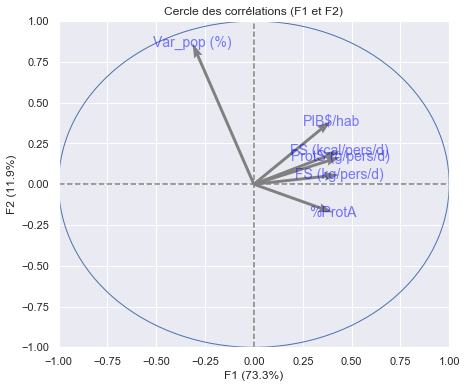

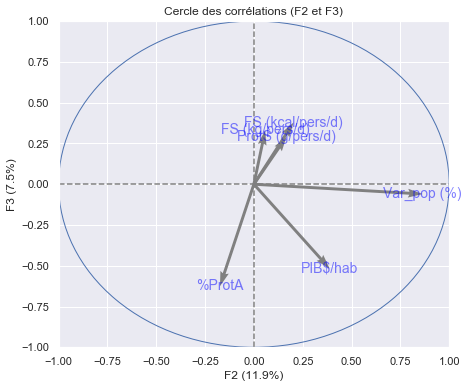

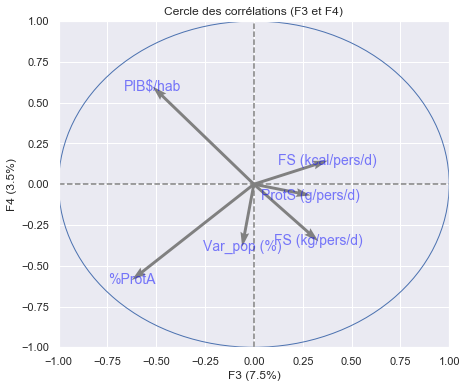

In [119]:
# Cercles des corrélations

pcs = pca.components_
functions.display_circles(pcs, 6, pca, [(0,1),(1,2),(2,3)], labels = np.array(features))

<div class="alert alert-block alert-info"> Sur le premier plan factoriel, on voit que :
    
- l'axe d'inertie principal est l'axe F1 des abscisses du graphique. Puis l'axe F2. Les 2 axes portent environ 85% de l'inertie.

- Les variables exprimant la ressource alimentaire sont corrélées positivement à F1. 
- Concernant FS (en kcal et kg) et Prot en unité de poids/pers/jour, comme elles sont aussi fortement corrélées entre elles: elles pointent dans la même direction et sont serrées.
- Elles sont toutes peu corrélées à F2.
    
- La variation de la population est anti-corrélée à F1 donc aux variables de ressources alimentaires.


**On peut interpréter ces résultats de la façon suivante :
Les pays qui ont une variation de la population importante (sous entendu pays instable démographiquement) ont moins accès aux ressources alimentaires. A contrario, les pays stables démographiquement ont plus accès aux ressources alimentaires.**
</div>

## Analyse des composantes

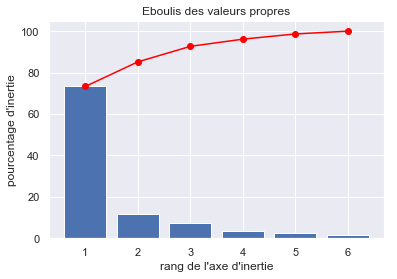

In [484]:
# Visualisation sur éboulis des valeurs propres

functions.display_scree_plot(pca)

In [121]:
# Proportion de variance expliquée
print(pca.explained_variance_ratio_)

[0.7329641  0.11878612 0.07479276 0.03478993 0.02512275 0.01354435]


**Critère du coude :** sur l’éboulis des valeurs propres, on observe un décrochement (coude) suivi d’une décroissance régulière. On sélectionne les axes avant le décrochement.


<div class="alert alert-block alert-info"> Ici, on a un décrochement après 2 composantes. Avec les 3 premiers axes on conserve > 90% de l'inertie. On peut donc choisir de garder entre 2 et 3 composantes.

**Au regard de l'ensemble des résultats on choisit de garder F1 et F2 pour caractériser notre jeu de données.**</div>

In [120]:
# 'Décomposition' des composantes principales

F1 = pca.components_[0]
F2 = pca.components_[1]
F3 = pca.components_[2]
F4 = pca.components_[3]
F5 = pca.components_[4]
F6 = pca.components_[5]

pd.DataFrame({'F1':F1,'F2':F2,'F3':F3,'F4':F4,'F5':F5, 'F6':F6}, X_ACP[mask].columns)

,F1,F2,F3,F4,F5,F6
FS (kcal/pers/d),0.439235,0.202914,0.378419,0.144768,-0.259050,0.731186
FS (kg/pers/d),0.436369,0.057889,0.330164,-0.349538,0.749658,-0.114273
ProtS (g/pers/d),0.443732,0.167128,0.291245,-0.068560,-0.528591,-0.637367
%ProtA,0.405378,-0.173555,-0.625219,-0.588124,-0.194643,0.175707
Var_pop (%),-0.314523,0.864112,-0.060090,-0.384448,-0.029436,0.045924
PIB$/hab,0.395602,0.388243,-0.518129,0.598727,0.229662,-0.114410


<div class="alert alert-block alert-info"> 
 
- La première composante (FS en kcal/pers/jour) accapare 73% de l’information disponible. 
- Avec les deux premiers nous avons plus de 85% de l'information disponible. Ce qui est satisfaisant pour une ACP.


- F1 est porté de façon quasi égalitaire par toutes les variables avec une anti-corrélation sur la variation de population.
- F2 est majoritairement porté par la variation de la population.

</div>

## Projection des pays

In [122]:
# Dataset standardisé 
X_ACP.head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,Var_pop (%),PIB$/hab,Cluster
0,1,Armenia,0.170038,1.375877,0.497292,0.480575,-0.867380,-0.550028,1
1,2,Afghanistan,-1.662095,-1.612114,-1.112932,-1.247131,1.222585,-0.928255,3
2,3,Albania,0.747915,1.893417,1.576344,0.821093,-1.061981,-0.372153,2
3,4,Algeria,0.977752,0.544165,0.591475,-0.850049,0.451468,-0.194542,4
4,7,Angola,-0.814980,0.036941,-1.163061,-0.533770,1.670343,-0.649095,3


In [123]:
# Dataset avec composantes principales

x = X_ACP.loc[:,features].values

X_projected = pca.fit_transform(x) # juste les valeurs

X_proj = pd.DataFrame(data = X_projected, columns = ['F1', 'F2','F3','F4','F5','F6']) # valeurs sur dataframe

X_proj = pd.concat([X_ACP[['Code_c','Country','Cluster']], X_proj],sort=False,axis=1)

X_proj = X_proj.iloc[:,:5] # on garde F1 et F2
X_proj.head(10)

,Code_c,Country,Cluster,F1,F2
0,1,Armenia,1,1.145774,-0.849200
1,2,Afghanistan,3,-3.184680,0.295918
2,3,Albania,2,2.373859,-0.679838
3,4,Algeria,4,0.365827,0.790873
4,7,Angola,3,-1.856457,0.926382
5,9,Argentina,1,1.865540,-0.053519
6,10,Australia,2,2.881443,0.878164
7,11,Austria,2,3.675718,0.579779
8,16,Bangladesh,5,-2.472227,-0.720162
9,19,Bolivia (Plurinational State of),5,-1.447183,-0.601933


In [124]:
# Fonction pour le nuage des individus

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig = plt.figure(figsize=(20,20))
        
            # Plot
            sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2],alpha=alpha, marker=marker) # selection de PC1 et PC2
            
            # Labels
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],fontsize='10', ha='center',va='center') 
                
            # Axis
            plt.xlim([-4,4])
            plt.ylim([-4,4])
            
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-100, 100], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

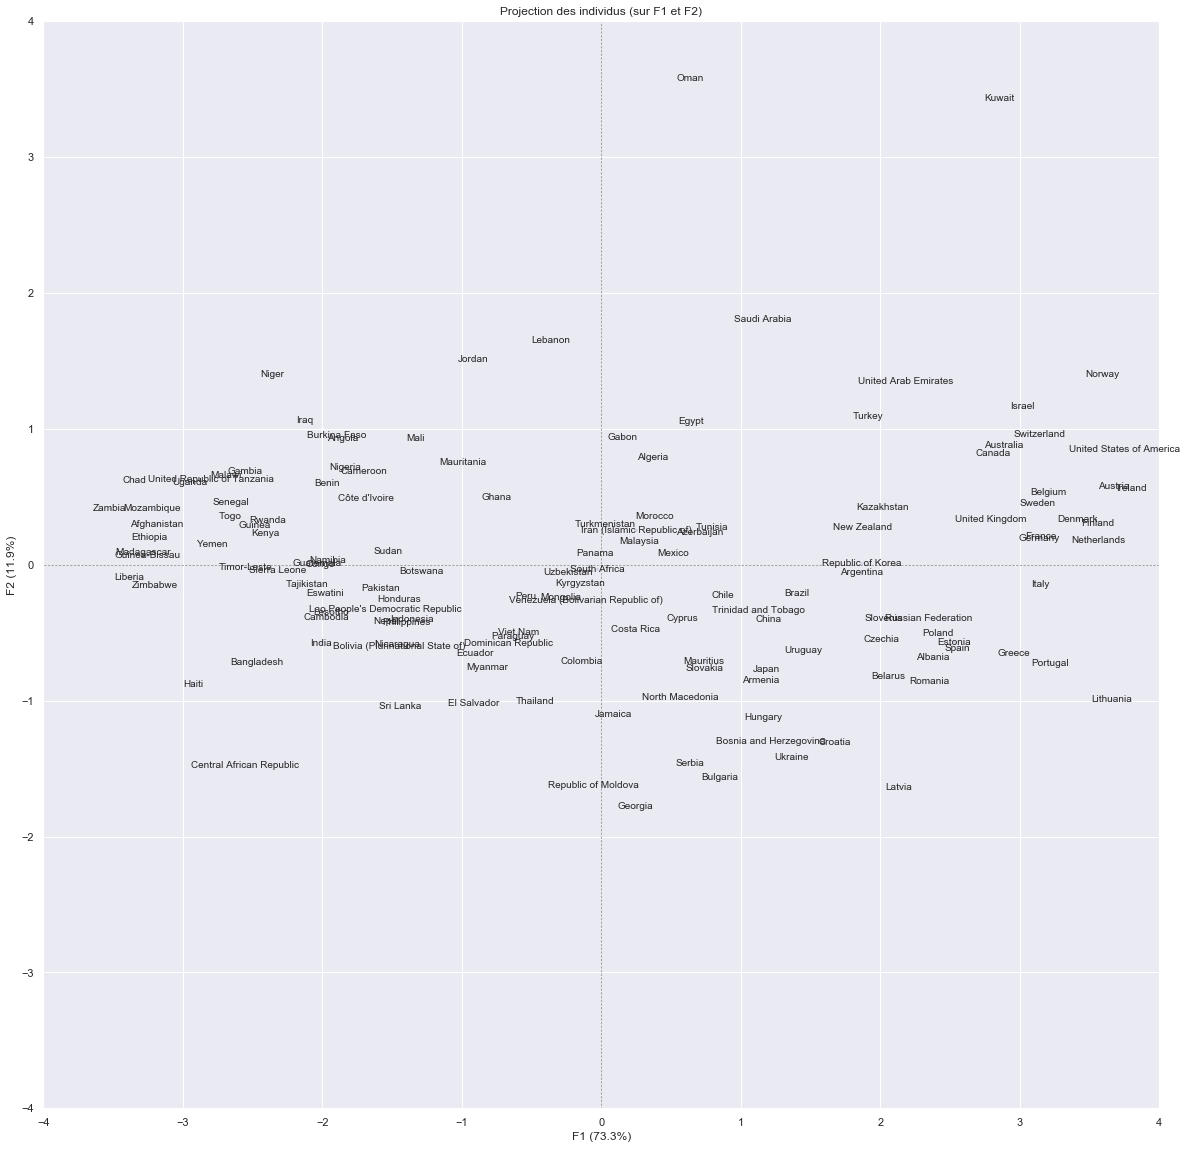

In [125]:
# Nuage de points des pays

names2 = X_ACP["Country"]
display_factorial_planes(X_projected, 2, pca, [(0,1)], labels=names2, marker='.', alpha = 0.2)

<div class="alert alert-block alert-info"> On retrouve sur notre projection :
     
- Le long de l'axe F2 porté principalement par la variation de la population, on retrouve :
    - dans les valeurs hautes extrêmes les pays déjà reperés comme des outliers tels que : Oman, Kuwait, Jordanie,Liban,... 
    - dans les valeurs basses : Georgie, Bulgarie, Bosnie, Bermudes...

 </div>

**Vérifications avec les données de base**

In [126]:
# Pays avec la variation de population la plus forte

data.sort_values(by='Var_pop (%)',ascending=False).head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
121,221,Oman,3140.0,821.33,88.21,0.518082,3711481.0,0.199467,41924.8,0.46
88,158,Niger,2549.0,456.15,80.93,0.181886,18426372.0,0.142056,874.1,-1.32
59,112,Jordan,3099.0,583.01,79.58,0.341669,8413464.0,0.132843,8756.7,-0.61
67,121,Lebanon,3059.0,768.84,79.59,0.368388,5276102.0,0.132556,14400.6,-1.69
64,118,Kuwait,3499.0,908.82,108.15,0.495331,3598385.0,0.130095,74084.5,0.17


In [127]:
# Pays avec la variation de population la plus faible

data.sort_values(by='Var_pop (%)',ascending=True).head()

,Code_c,Country,FS (kcal/pers/d),FS (kg/pers/d),ProtS (g/pers/d),%ProtA,pop2013,Var_pop (%),PIB$/hab,Ix_stab
65,119,Latvia,3172.0,864.18,91.34,0.557916,2040784.0,-0.046733,21563.7,0.59
70,126,Lithuania,3414.0,1050.07,124.36,0.615069,2997334.0,-0.037033,25143.9,0.96
35,73,Georgia,2902.0,649.44,80.50,0.358012,4045910.0,-0.034214,8254.0,-0.44
39,80,Bosnia and Herzegovina,3156.0,913.01,91.50,0.332240,3604999.0,-0.027939,10284.8,-0.40
12,27,Bulgaria,2828.0,707.76,83.41,0.495144,7266141.0,-0.025629,15997.4,0.17


**Quels sont les pays qui pèsent le plus dans l'inertie totale ?**


Autrement dit des pays dont les caractéristiques globales sont les plus en marge du reste du Monde.

In [128]:
# Contribution des individus dans l'inertie totale

Z = StandardScaler().fit_transform(X_ACP[mask])

di = np.sum(Z**2,axis=1)

inertie = pd.DataFrame({'Country': X_ACP.Country,'d_i':di}).sort_values(by='d_i', ascending=False)
inertie.head(10)

,Country,d_i
64,Kuwait,22.245729
90,Norway,16.443527
70,Lithuania,15.353413
52,Ireland,15.141852
128,United States of America,15.134389
121,Oman,14.902191
7,Austria,14.180960
84,Netherlands,13.641498
33,Finland,13.184470
136,Zambia,13.147600


<div class="alert alert-block alert-info"> On observe ces pays à la marge du nuage de points des individus.</div>

## Projection Clusters

In [129]:
# Fonction pour le nuage des cluster

def display_factorial_planes2(X_projected, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig = plt.figure(figsize=(20,20))
        
            # Plot
            plt.scatter(X_proj.iloc[:, 3],X_proj.iloc[:, 4], c=X_proj.loc[:,'Cluster'],cmap='Paired', 
                        marker=marker, alpha=alpha)
            
            # Labels
            for label,x, y in zip(labels, X_projected[:, d1], X_projected[:, d2]):  
                plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
                
            # Axis
            plt.xlim([-4,4])
            plt.ylim([-4,4])
            
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-100, 100], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

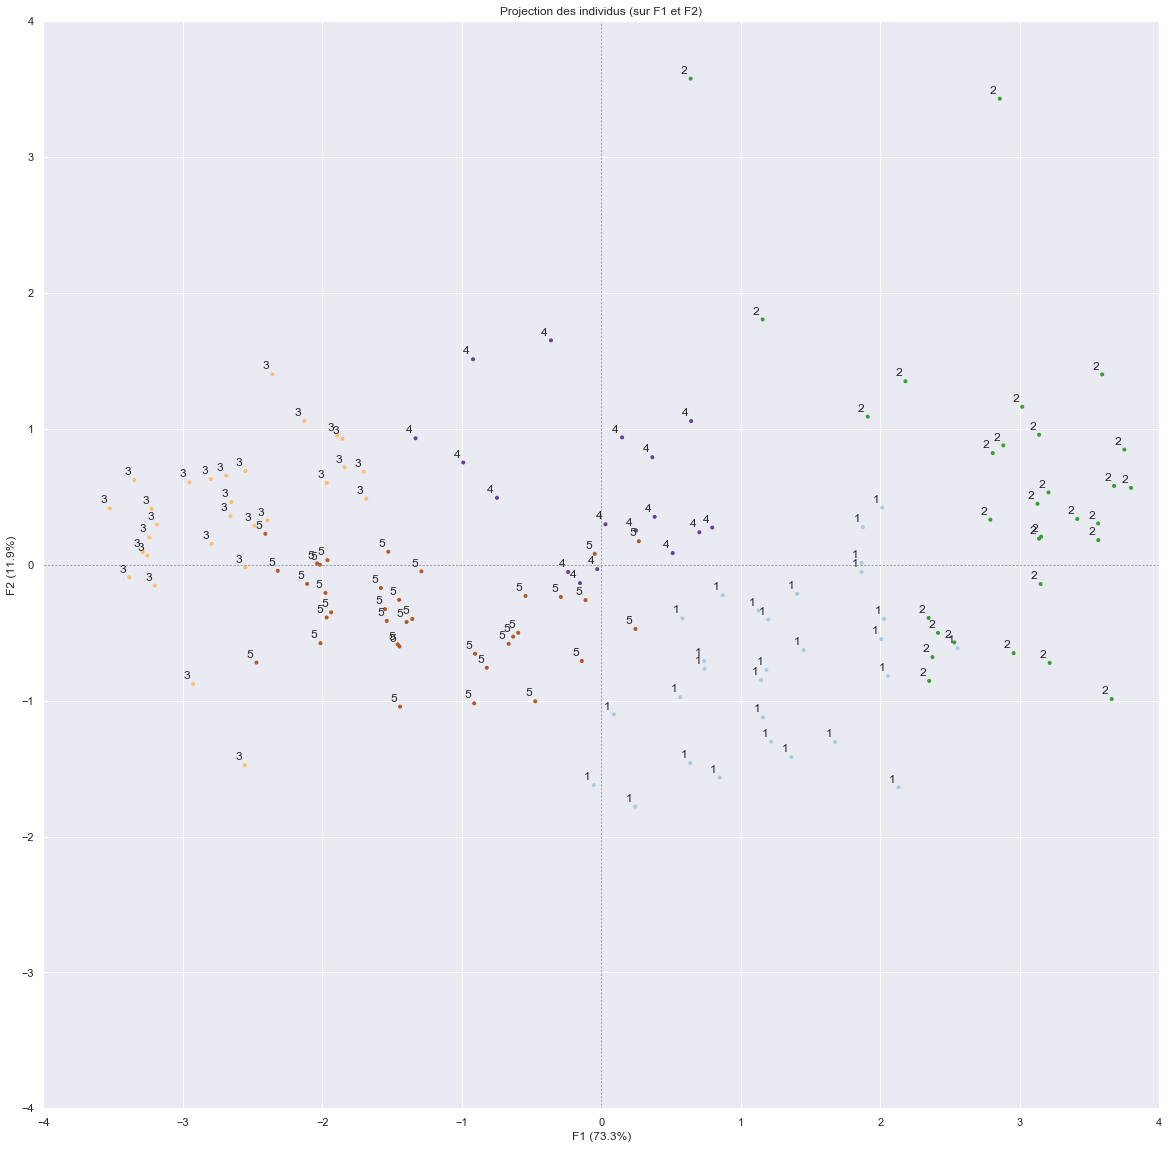

In [130]:
# Nuage de points des clusters

names3 = X_ACP["Cluster"]
display_factorial_planes2(X_projected, 2, pca, [(0,1)], labels=names3, marker='.')

<div class="alert alert-block alert-info"> 

Ce qu'on veut : c'est sélectionner les pays qui ont des ressources fortes et une démographie stable autrement dit des pays situés proche de l'axe F1 vers les valeurs positives : il s'agit de certains pays du groupe 2.

- 3 pays du groupe 2 ont des valeurs atypiques pour le groupe : Oman, Arabie Saoudite et Kuweit. Ces pays ont des variations de population importantes indicant une tendance à l'accroissement de la population. Cela peut aussi être un indicateur d'instabilité.

- Certains pays ont des niveaux de ressources alimentaires inférieur au reste du groupe.

</div>

**Visualisation de ces observations**

In [144]:
# Vérification de la stabilité démographique des pays du cluster 2

tp2 = X_proj[X_proj.Country.isin(gp2)]

dem = tp2[tp2['F2'] > 1.5]['Country']
dem

64           Kuwait
105    Saudi Arabia
121            Oman
Name: Country, dtype: object

In [145]:
food = tp2[tp2['F2'] < 0]['Country']
food

2                 Albania
32                Estonia
41                 Greece
54                  Italy
70              Lithuania
97                 Poland
98               Portugal
102               Romania
104    Russian Federation
Name: Country, dtype: object

In [146]:
# Vérification de la stabilité des pays du cluster 2

neg = temp2[temp2.Ix_stab <0]['Country']
neg

41                 Greece
53                 Israel
104    Russian Federation
105          Saudi Arabia
123                Turkey
Name: Country, dtype: object

<div class="alert alert-block alert-info"> 
    
- Le groupe 2 est le groupe des pays à cibler.
- Au sein du groupe 2 certains pays sont plus intéressants que d'autres pour démarrer le développement d'une activité.

**Je choisis de ne pas garder les pays pointés précédemment, ils resteront intéressants à posteriori quand le marché sera déjà installé dans les autres pays et en fonction des évolutions géopolitiques.**
</div>

In [150]:
# Liste complète des pays non retenus
frames = [dem,food,neg]

out = pd.concat(frames).tolist()
out

['Kuwait',
 'Saudi Arabia',
 'Oman',
 'Albania',
 'Estonia',
 'Greece',
 'Italy',
 'Lithuania',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Greece',
 'Israel',
 'Russian Federation',
 'Saudi Arabia',
 'Turkey']

# Livrables

## Liste des pays

In [151]:
# Liste des pays ciblés

target = X_proj[(X_proj.Cluster == 2) & (~X_proj.Country.isin(out))][['Code_c', 'Country']]

pays = target.Country.tolist()
print(pays)

['Australia', 'Austria', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Belgium']


<div class="alert alert-block alert-info">  Attention, le Royaume Unis est certainement à classer dans les pays instables à ce jour à cause du Brexit. </div>

In [153]:
# Nombre de pays ciblés

len(target)

16

In [154]:
# Exportation de la liste des pays au format csv

liste_pays = target.to_csv(Path.cwd() / "reports" / "Livrables" / "Pays_cibles.csv", encoding='utf-8',index=False)

## Centroïdes des clusters

### Point moyen

La CAH n'utilise pas de centroïdes. On peut par exemple, utiliser la moyenne des clusters pour caractériser le point le plus représentatif du cluster.

In [155]:
# Coordonnées du point moyen de chaque clusters

mean_c = X_proj.groupby(['Cluster']).mean()[['F1','F2']].reset_index()
mean_c

,Cluster,F1,F2
0,1,1.261277,-0.769503
1,2,2.877794,0.516165
2,3,-2.658167,0.361214
3,4,-0.055425,0.552933
4,5,-1.246716,-0.362345


In [156]:
# Distance entre les points moyens des clusters

matrix = pd.DataFrame(squareform(pdist(mean_c.iloc[:,1:],metric='euclidean')),columns=mean_c['Cluster'],
                      index=mean_c['Cluster'])
matrix.head()

Cluster,1,2,3,4,5
Cluster,,,,,
1,0.000000,2.065446,4.079285,1.866157,2.540828
2,2.065446,0.000000,5.538129,2.933449,4.217032
3,4.079285,5.538129,0.000000,2.609794,1.586106
4,1.866157,2.933449,2.609794,0.000000,1.502301
5,2.540828,4.217032,1.586106,1.502301,0.000000


*On retrouve les distances et la position du point moyen sur la projection au 7.2.3.*

### Point le plus proche du centroïde

On peut aussi calculer les distances entre les points du cluster et déterminer le point le plus proche de tous les autres: ce point pourra être considéré comme le point le plus proche du centroïde.

In [157]:
# Clusters
c1 = X_proj[X_proj.Cluster == 1]
c2 = X_proj[X_proj.Cluster == 2]
c3 = X_proj[X_proj.Cluster == 3]
c4 = X_proj[X_proj.Cluster == 4]
c5 = X_proj[X_proj.Cluster == 5]

In [158]:
# Création d'une matrice de distance au carré entre chaque point du cluster : exemple avec cluster 1

matrix1 = pd.DataFrame(squareform(pdist(c1.iloc[:,3:],metric='euclidean')),columns=c1['Country'],index=c1['Country'])

matrix1.head()

Country,Armenia,Argentina,Brazil,Bulgaria,Chile,Cyprus,Belarus,Georgia,Bosnia and Herzegovina,Hungary,...,New Zealand,Czechia,Slovenia,Slovakia,Spain,Trinidad and Tobago,Ukraine,Uruguay,Serbia,China
Country,,,,,,,,,,,,,,,,,,,,,
Armenia,0.000000,1.072927,0.685403,0.776190,0.681855,0.723950,0.908710,1.297026,0.458808,0.273875,...,1.341401,0.913042,0.989829,0.414061,1.428199,0.511264,0.606419,0.376309,0.794555,0.447010
Argentina,1.072927,0.000000,0.489108,1.822777,1.009499,1.327934,0.789375,2.369587,1.407476,1.281347,...,0.330083,0.514581,0.380658,1.331091,0.888535,0.790745,1.451788,0.709028,1.867102,0.755100
Brazil,0.685403,0.489108,0.000000,1.461583,0.532908,0.840980,0.888974,1.949313,1.104308,0.940846,...,0.680632,0.690326,0.650007,0.861962,1.218673,0.302368,1.202041,0.416876,1.462432,0.281126
Bulgaria,0.776190,1.822777,1.461583,0.000000,1.341167,1.201376,1.417679,0.642840,0.452807,0.541574,...,2.109435,1.542810,1.659099,0.808744,1.953471,1.259347,0.535812,1.114401,0.236698,1.212314
Chile,0.681855,1.009499,0.532908,1.341167,0.000000,0.334662,1.324342,1.676738,1.131405,0.942745,...,1.122932,1.181903,1.169038,0.555033,1.728215,0.280811,1.287885,0.706062,1.256329,0.372841


In [159]:
# Affichage du pays le plus proche de tous les autres pays du cluster 1

matrix1['Total'] = matrix1.sum(axis=0) # somme des distances

t1 = matrix1[['Total']].reset_index().sort_values(by='Total').head(1) # tri et affichage du pays
t1

Country,Country,Total
13,Japan,22.767732


In [160]:
# Affichage du pays le plus proche de tous les autres pays du cluster 2

matrix2 = pd.DataFrame(squareform(pdist(c2.iloc[:,3:],metric='euclidean')),columns=c2['Country'],index=c2['Country'])

matrix2['Total'] = matrix2.sum(axis=0) # somme des distances

t2 = matrix2[['Total']].reset_index().sort_values(by='Total').head(1) # tri et affichage du pays
t2

Country,Country,Total
22,Sweden,30.372789


In [161]:
# Affichage du pays le plus proche de tous les autres pays du cluster 3

matrix3 = pd.DataFrame(squareform(pdist(c3.iloc[:,3:],metric='euclidean')),columns=c3['Country'],index=c3['Country'])

matrix3['Total'] = matrix3.sum(axis=0) # somme des distances

t3 = matrix3[['Total']].reset_index().sort_values(by='Total').head(1) # tri et affichage du pays
t3

Country,Country,Total
23,Togo,19.415353


In [162]:
# Affichage du pays le plus proche de tous les autres pays du cluster 4

matrix4 = pd.DataFrame(squareform(pdist(c4.iloc[:,3:],metric='euclidean')),columns=c4['Country'],index=c4['Country'])

matrix4['Total'] = matrix4.sum(axis=0) # somme des distances

t4 = matrix4[['Total']].reset_index().sort_values(by='Total').head(1) # tri et affichage du pays
t4

Country,Country,Total
14,Turkmenistan,12.386574


In [163]:
# Affichage du pays le plus proche de tous les autres pays du cluster 5

matrix5 = pd.DataFrame(squareform(pdist(c5.iloc[:,3:],metric='euclidean')),columns=c5['Country'],index=c5['Country'])

matrix5['Total'] = matrix5.sum(axis=0) # somme des distances

t5 = matrix5[['Total']].reset_index().sort_values(by='Total').head(1) # tri et affichage du pays
t5

Country,Country,Total
14,Indonesia,26.28965


In [164]:
# Coordonnées des points les plus proches des centroïdes pour chaque cluster

frames = [t1,t2,t3,t4,t5]

result = pd.concat(frames).Country.tolist()

closest = X_proj[X_proj.Country.isin(result)]
closest

,Code_c,Country,Cluster,F1,F2
49,101,Indonesia,5,-1.354992,-0.399348
58,110,Japan,1,1.183132,-0.773638
114,210,Sweden,2,3.126486,0.448289
116,213,Turkmenistan,4,0.029820,0.297485
119,217,Togo,3,-2.658562,0.357415


### Visualisation des  2 méthodes

In [169]:
# Fonction pour afficher le point moyen sur la projection
def display_factorial_planes4(X_projected, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig = plt.figure(figsize=(20,20))
        
            # Plot
            plt.scatter(X_proj.iloc[:, 3],X_proj.iloc[:, 4], c=X_proj.loc[:,'Cluster'],cmap='Paired', 
                        marker=marker, alpha=alpha)
            plt.scatter(mean_c.F1, mean_c.F2, marker='*', color='red')
            plt.scatter(closest.F1, closest.F2, marker='*', color='blue')
            
            # Labels
            for label,x, y in zip(labels, X_projected[:, d1], X_projected[:, d2]):  
                plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
                
            # Axis
            plt.xlim([-4,4])
            plt.ylim([-4,4])
            
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-100, 100], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title('Projection des individus sur F1 et F2 - Point moyen en ROUGE / Point le plus proche en BLEU',fontsize= 18)
            
            plt.show(block=False)

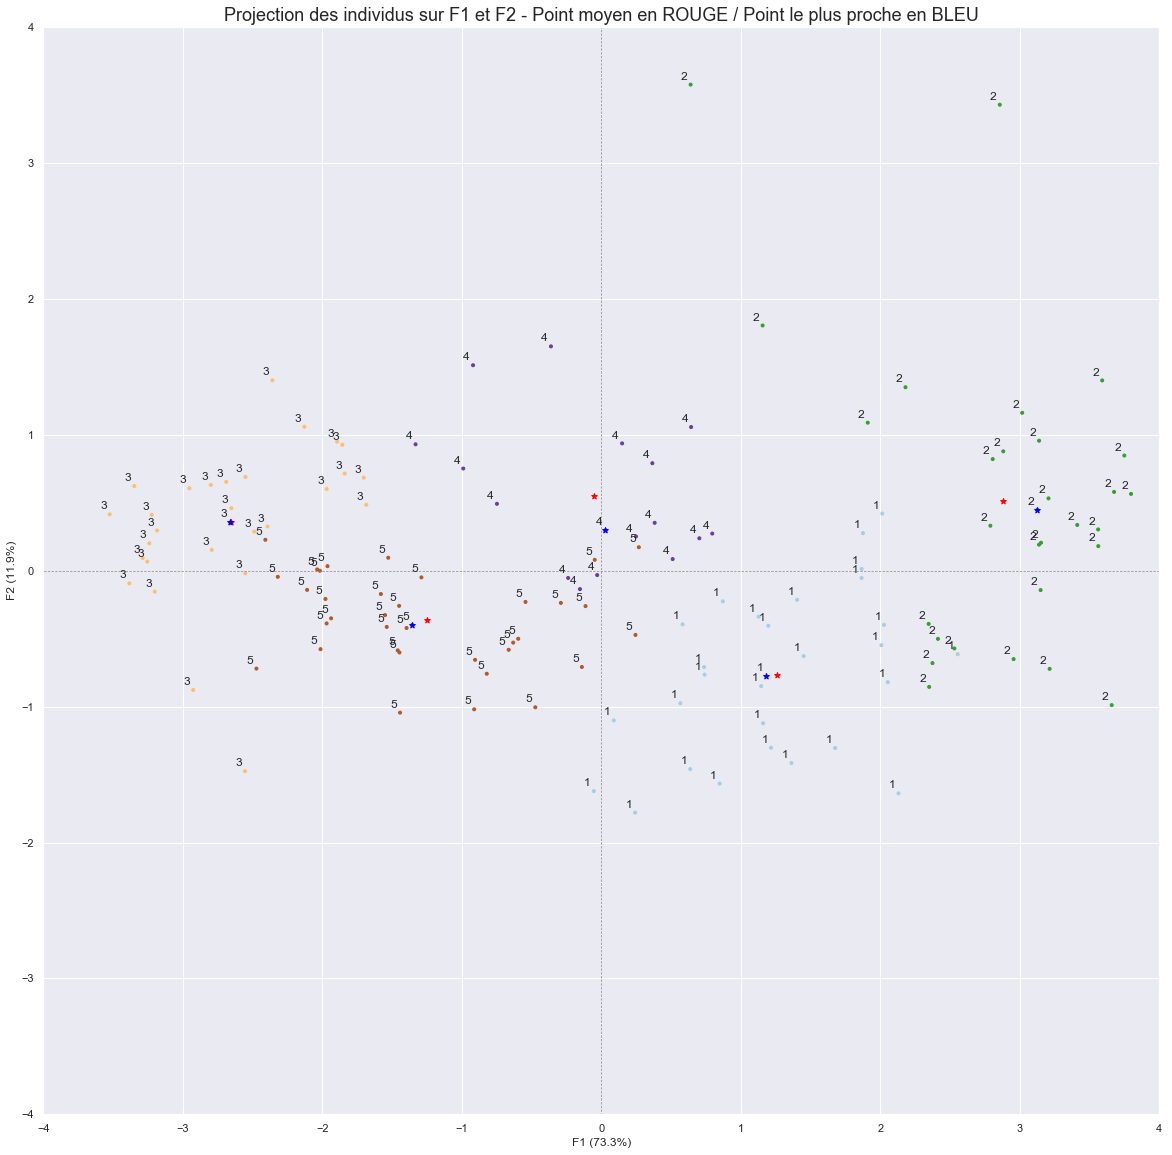

In [170]:
# Projection du nuage de points

names3 = X_proj["Cluster"]
display_factorial_planes4(X_projected, 2, pca, [(0,1)], labels=names3, marker='.')

<div class="alert alert-block alert-info"> Les résultats des 2 approches sont relativement comparables.</div>

In [171]:
# Exportation des coordonnées au format csv pour les 2 approches

point_mean = mean_c.to_csv(Path.cwd() / "reports" / "Livrables" / "Point_mean.csv", encoding='utf-8',index=False)
point_closest = closest.to_csv(Path.cwd() / "reports" / "Livrables" / "Point_closest.csv", encoding='utf-8',index=False)